<h1><center>New York City Taxi Trip Duration</center></h1>

<img src='img/taxi.png'>

---

## Contents

- EDA
- Feature Select
- Modeling
- Evaluation

In [1]:
# Setting
from function import * # import function
train = pd.read_csv('data/train.csv') # import train data
test = pd.read_csv('data/test.csv') # import test data
submission = pd.read_csv('data/sample_submission.csv')

---

# 1. EDA

### 1.1 Overall information

In [2]:
# check shape
print('train shape :', train.shape) 
print('test shape :', test.shape) 

train shape : (1458644, 11)
test shape : (625134, 9)


In [3]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
# check null
train.isnull().any()

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool

In [5]:
# Unique
print('train unique 갯수')
for i in range(11):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
id : 1458644개
vendor_id : 2개
pickup_datetime : 1380222개
dropoff_datetime : 1380377개
passenger_count : 10개
pickup_longitude : 23047개
pickup_latitude : 45245개
dropoff_longitude : 33821개
dropoff_latitude : 62519개
store_and_fwd_flag : 2개
trip_duration : 7417개


### 1.2 Y data

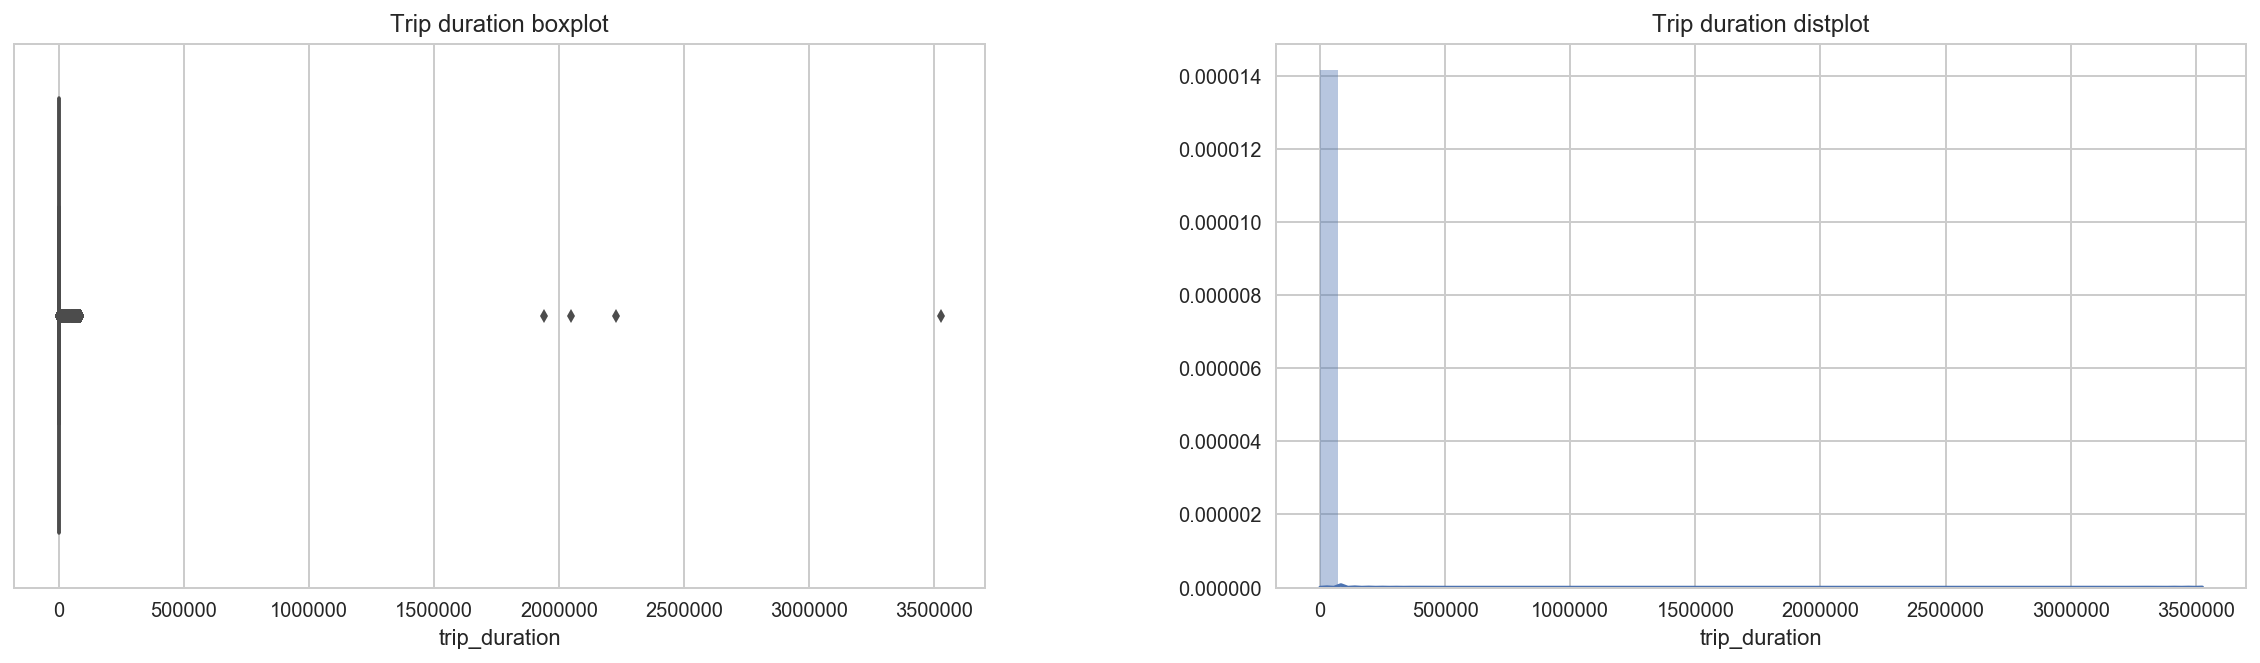

In [6]:
# trip duration
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

# boxplot
plt.subplot(121)
sns.boxplot(x = 'trip_duration', data = train)
plt.title('Trip duration boxplot')

# distplot
plt.subplot(122)
sns.distplot(train['trip_duration'].values, axlabel = 'trip_duration')
plt.title('Trip duration distplot')

plt.show()

#### Note :

1. 이상치가 너무 커서 데이터를 파악하기 힘듦 (outlier 제거)
2. 분포 시각화에 대한 필요성 (log)

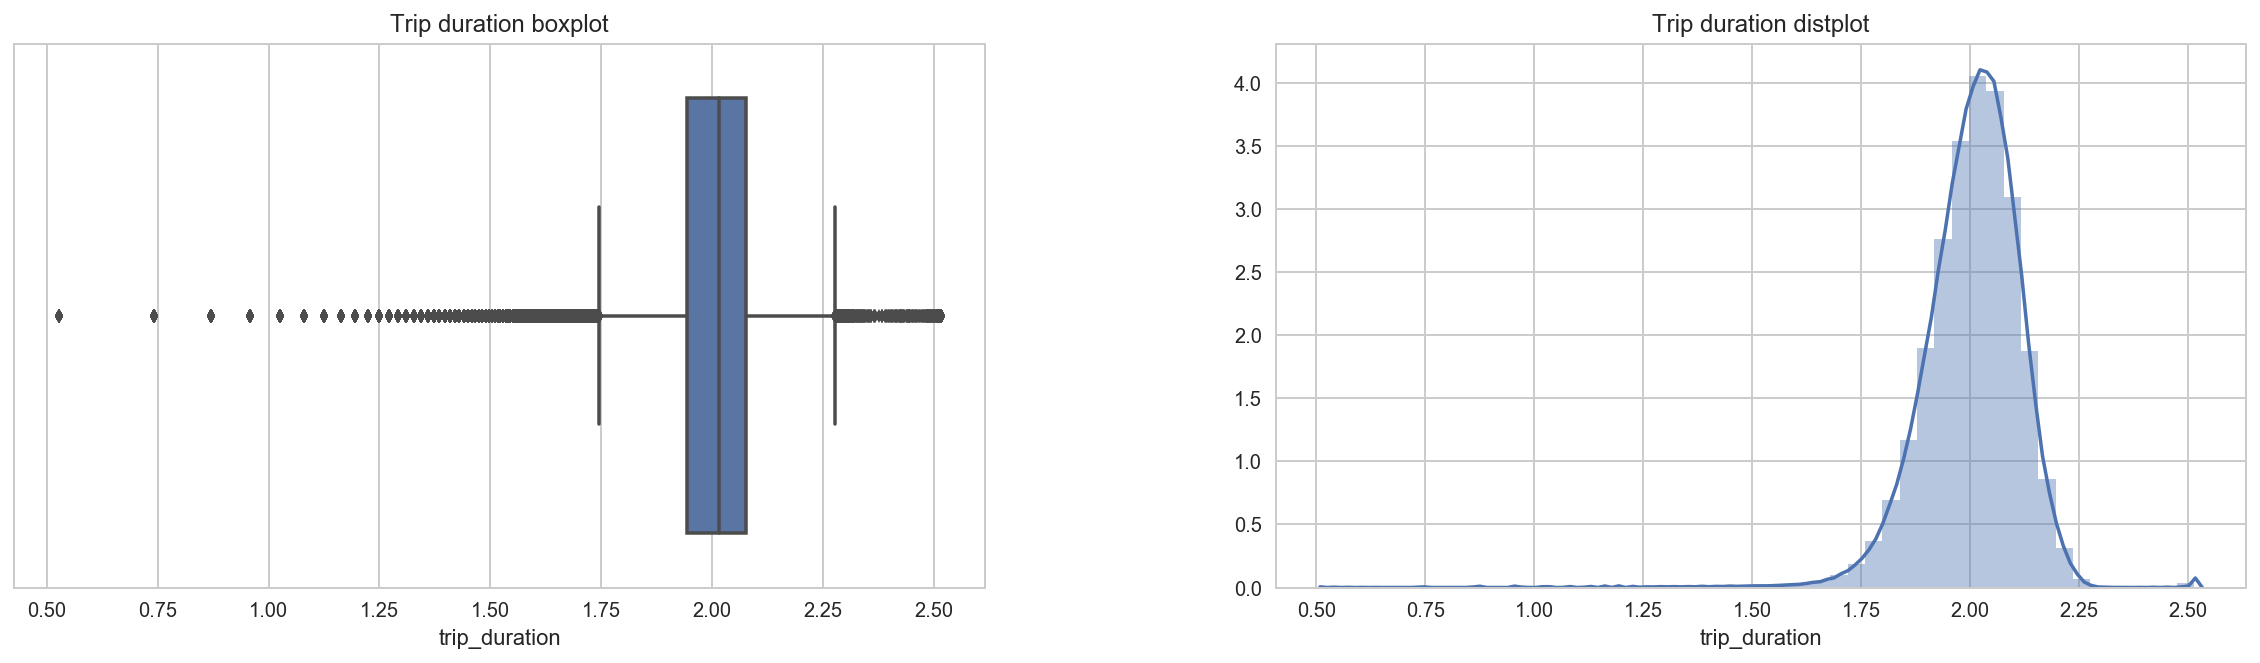

In [7]:
# 약간의 preprocessing
train = train[train['trip_duration'] < 1500000].reset_index(drop=True) # 4개 outlier 제거
train['trip_duration'] = np.log1p(train['trip_duration'])

# trip duration
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

# boxplot
plt.subplot(121)
sns.boxplot(x = np.log1p(train['trip_duration']), data = train)
plt.title('Trip duration boxplot')

# distplot
plt.subplot(122)
sns.distplot(np.log1p(train['trip_duration']).values, axlabel = 'trip_duration')
plt.title('Trip duration distplot')

plt.show()

#### Note :
1. 4개의 극이상치를 제거
2. log를 취한 Trip duration을 y로 재정의하여 진행

### 1.3 Y data & X data

In [8]:
# EDA를 편하게 하기 위해 type별 정렬
category = ['vendor_id', 'passenger_count', 'store_and_fwd_flag',]
continuous = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
date = ['pickup_datetime', 'dropoff_datetime']
y_train = ['trip_duration']

# train data
train = pd.concat([train[category], train[continuous], train[date], train[y_train]], axis = 1)
train.tail()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_datetime,dropoff_datetime,trip_duration
1458635,2,4,N,-73.982201,40.745522,-73.994911,40.740170,2016-04-08 13:31:04,2016-04-08 13:44:02,6.658011
1458636,1,1,N,-74.000946,40.747379,-73.970184,40.796547,2016-01-10 07:35:15,2016-01-10 07:46:10,6.486161
1458637,2,1,N,-73.959129,40.768799,-74.004433,40.707371,2016-04-22 06:57:41,2016-04-22 07:10:25,6.639876
1458638,1,1,N,-73.982079,40.749062,-73.974632,40.757107,2016-01-05 15:56:26,2016-01-05 16:02:39,5.924256
1458639,1,1,N,-73.979538,40.781750,-73.972809,40.790585,2016-04-05 14:44:25,2016-04-05 14:47:43,5.293305


#### 1.3.1 Category

In [9]:
# store_and_fwd_flag Preprocessing
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

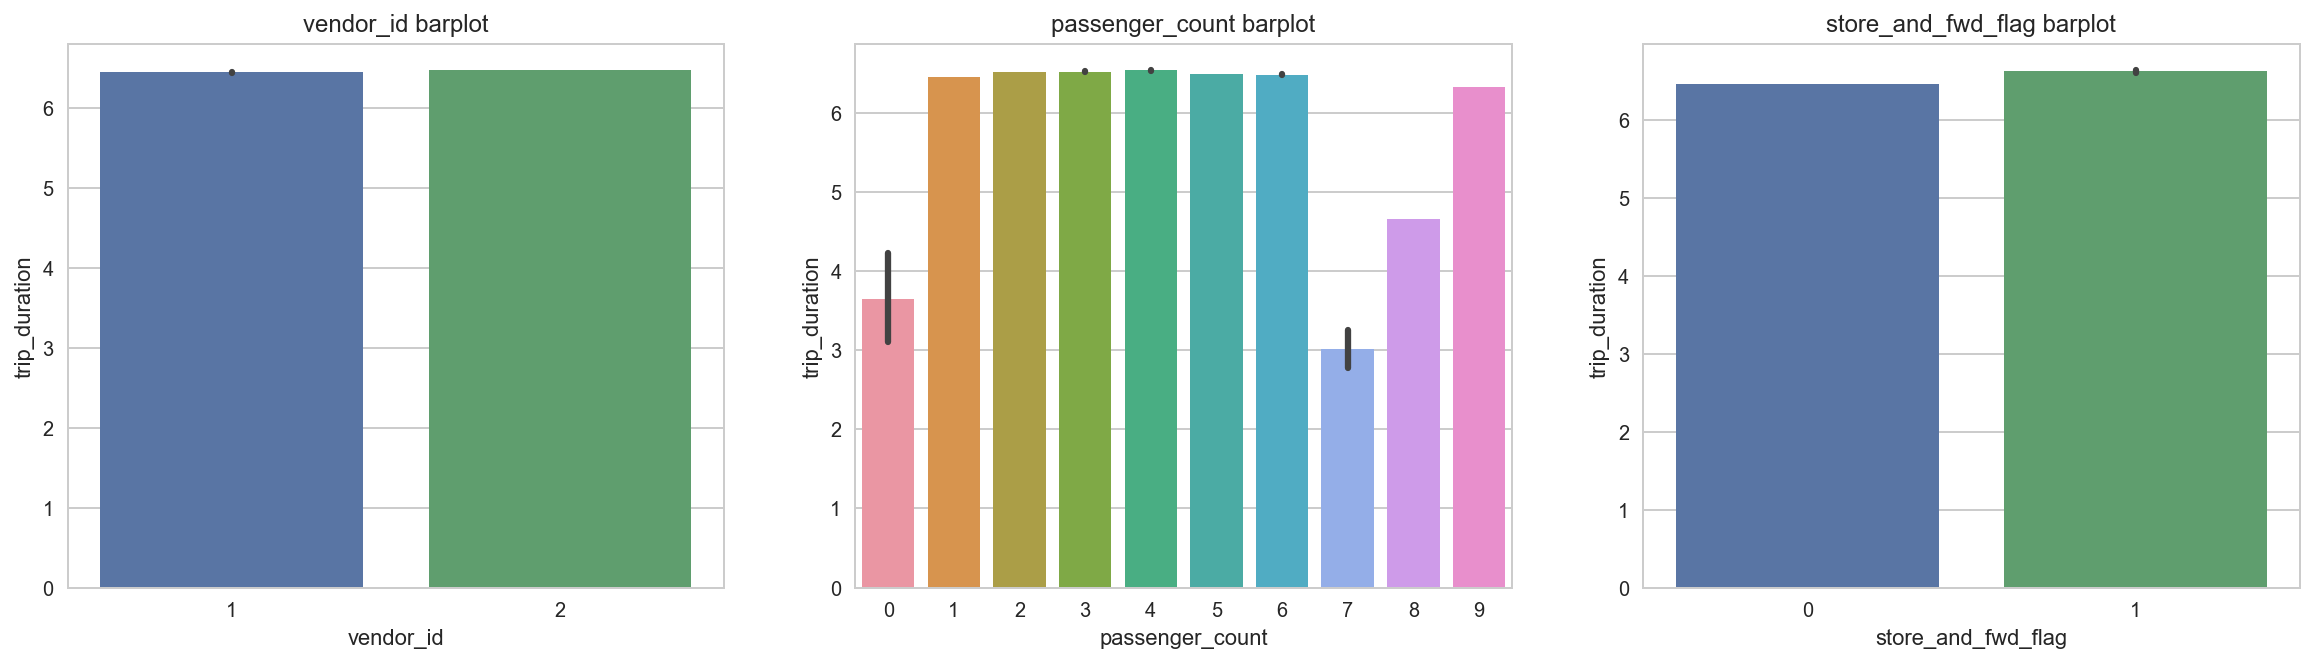

In [10]:
# feature countplot
plt.figure(figsize=(20, 5))
subplots_adjust(hspace = 0.3)

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.barplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} barplot'.format(train.columns[i]))

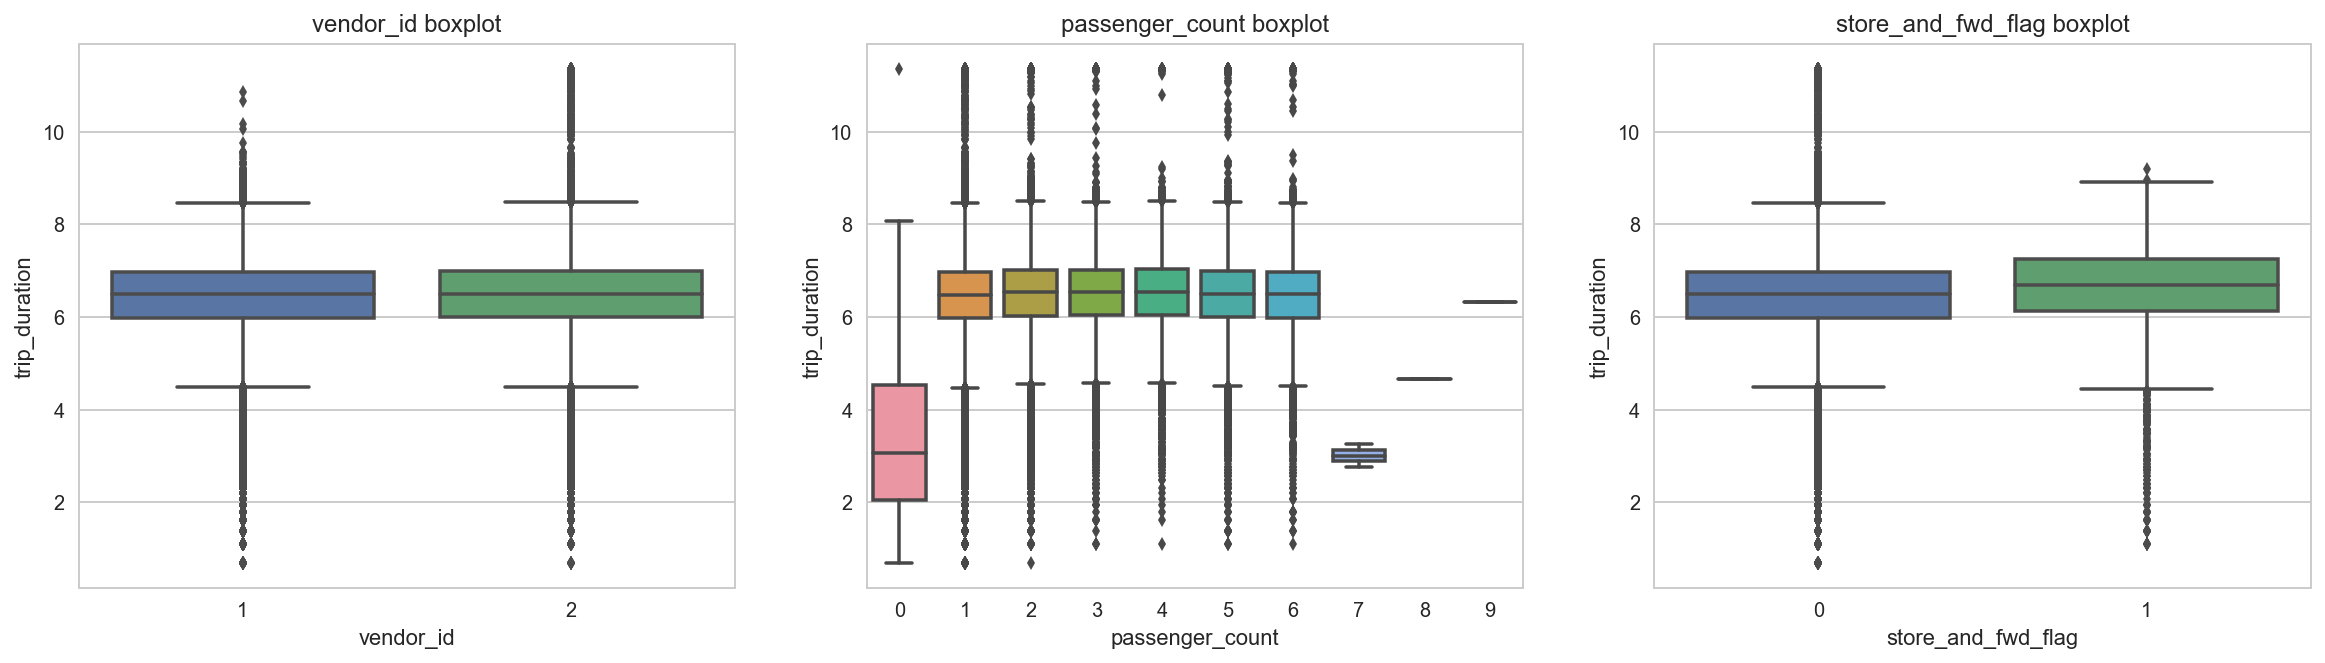

In [11]:
# feature boxplot
plt.figure(figsize=(20, 5))
subplots_adjust(hspace = 0.3)

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} boxplot'.format(train.columns[i]))

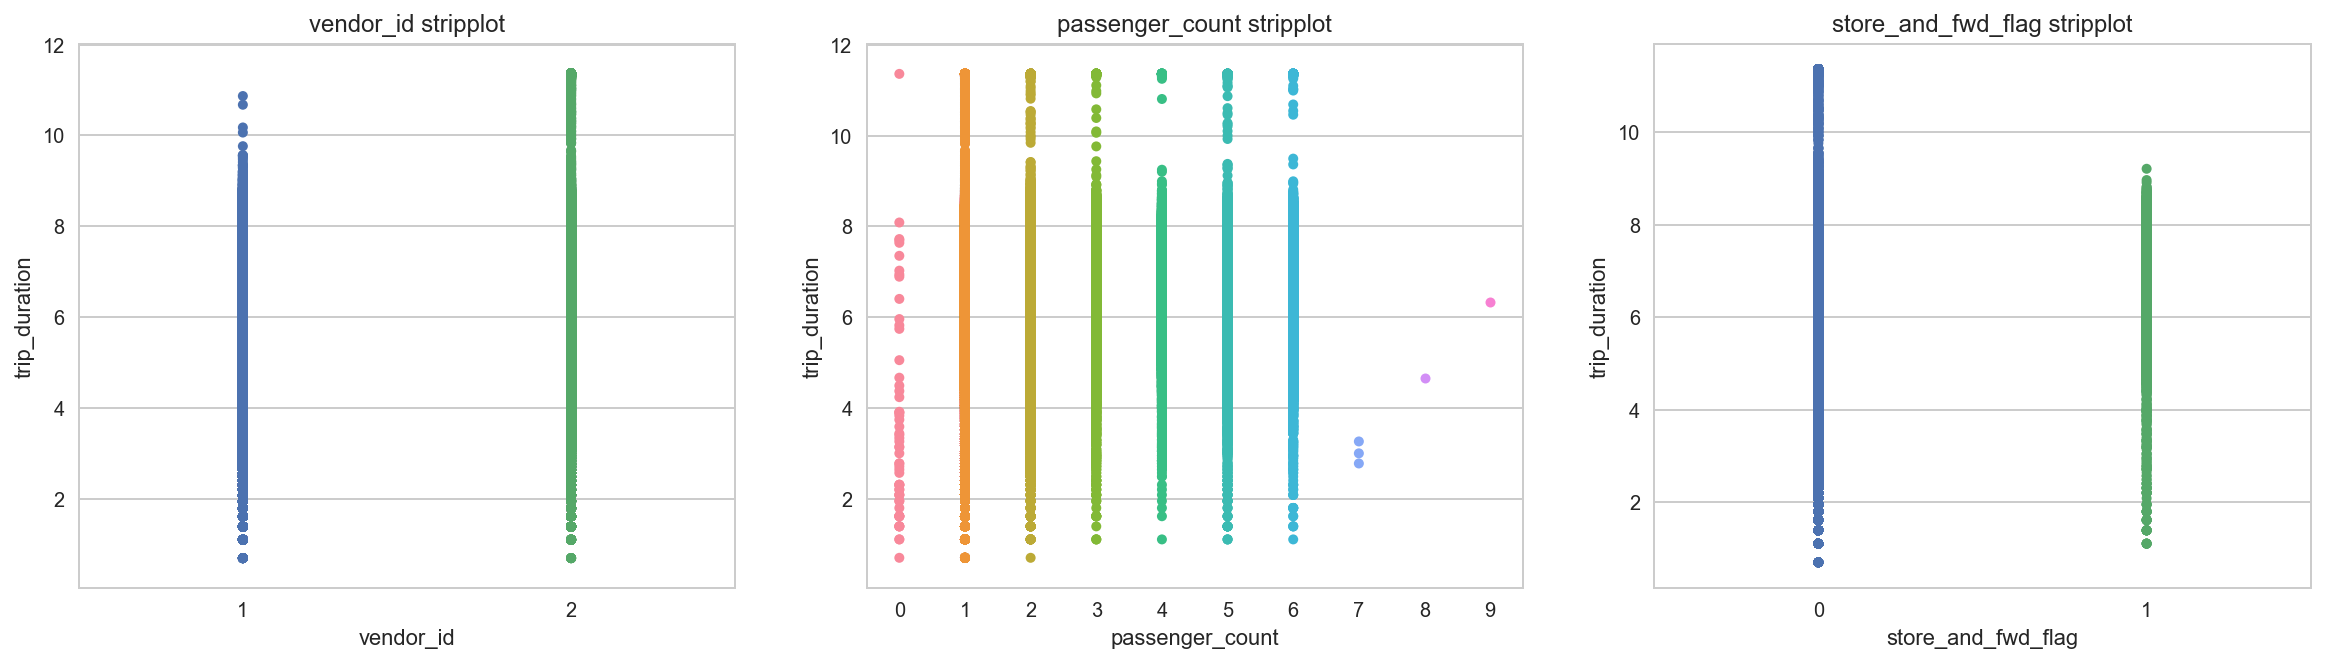

In [12]:
# feature stripplot
plt.figure(figsize=(20, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.stripplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} stripplot'.format(train.columns[i]))

#### 1.3.2 Continuous

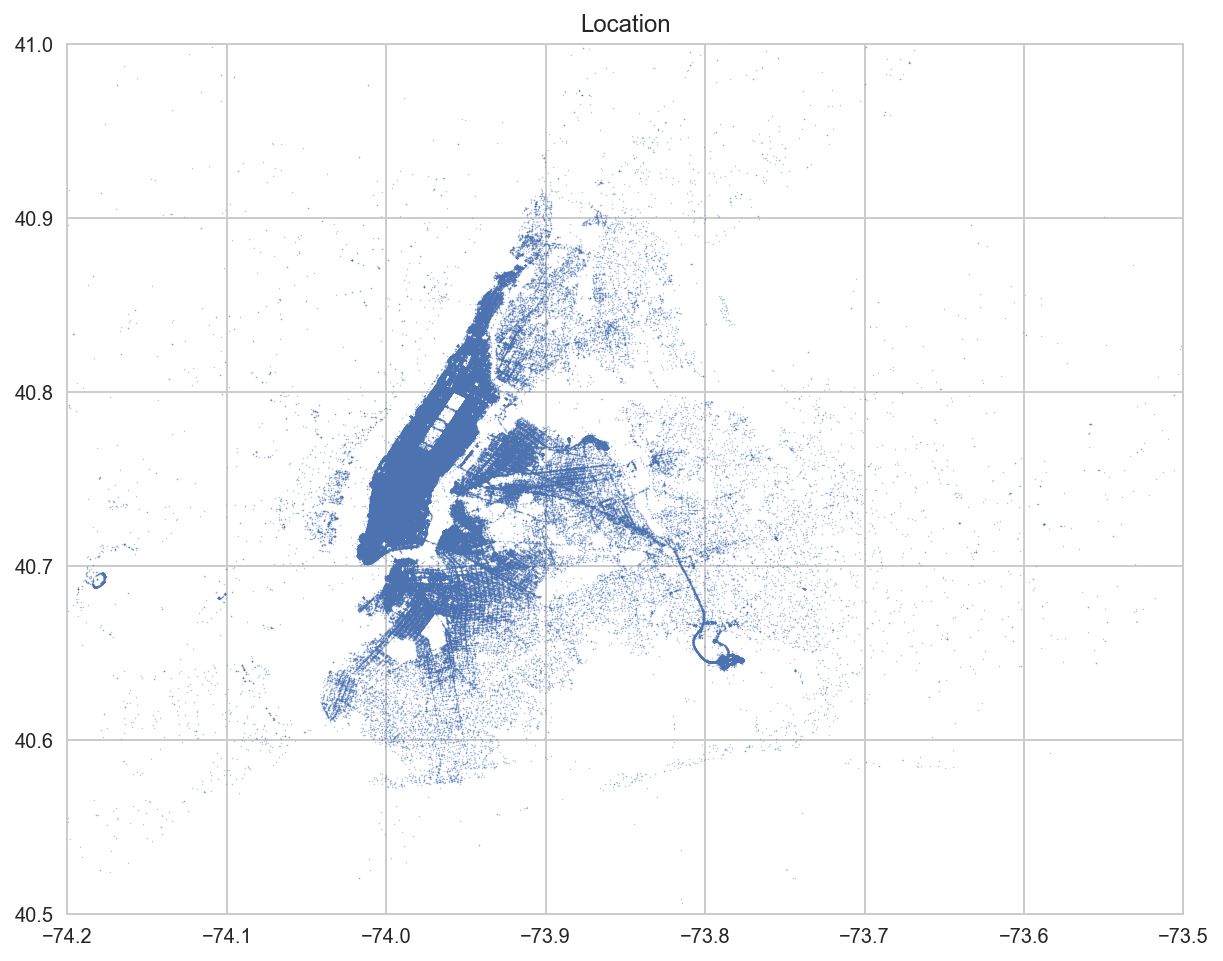

In [13]:
# location
plt.figure(figsize = (10, 8))
longitude = list(train['pickup_longitude']) + list(train['dropoff_longitude'])
latitude = list(train['pickup_latitude']) + list(train['dropoff_latitude'])

plt.title('Location')
plt.xlim(-74.2, -73.5)
plt.ylim(40.5, 41)
plt.plot(longitude, latitude, '.', alpha = 0.4, markersize = 1.5)

plt.show()

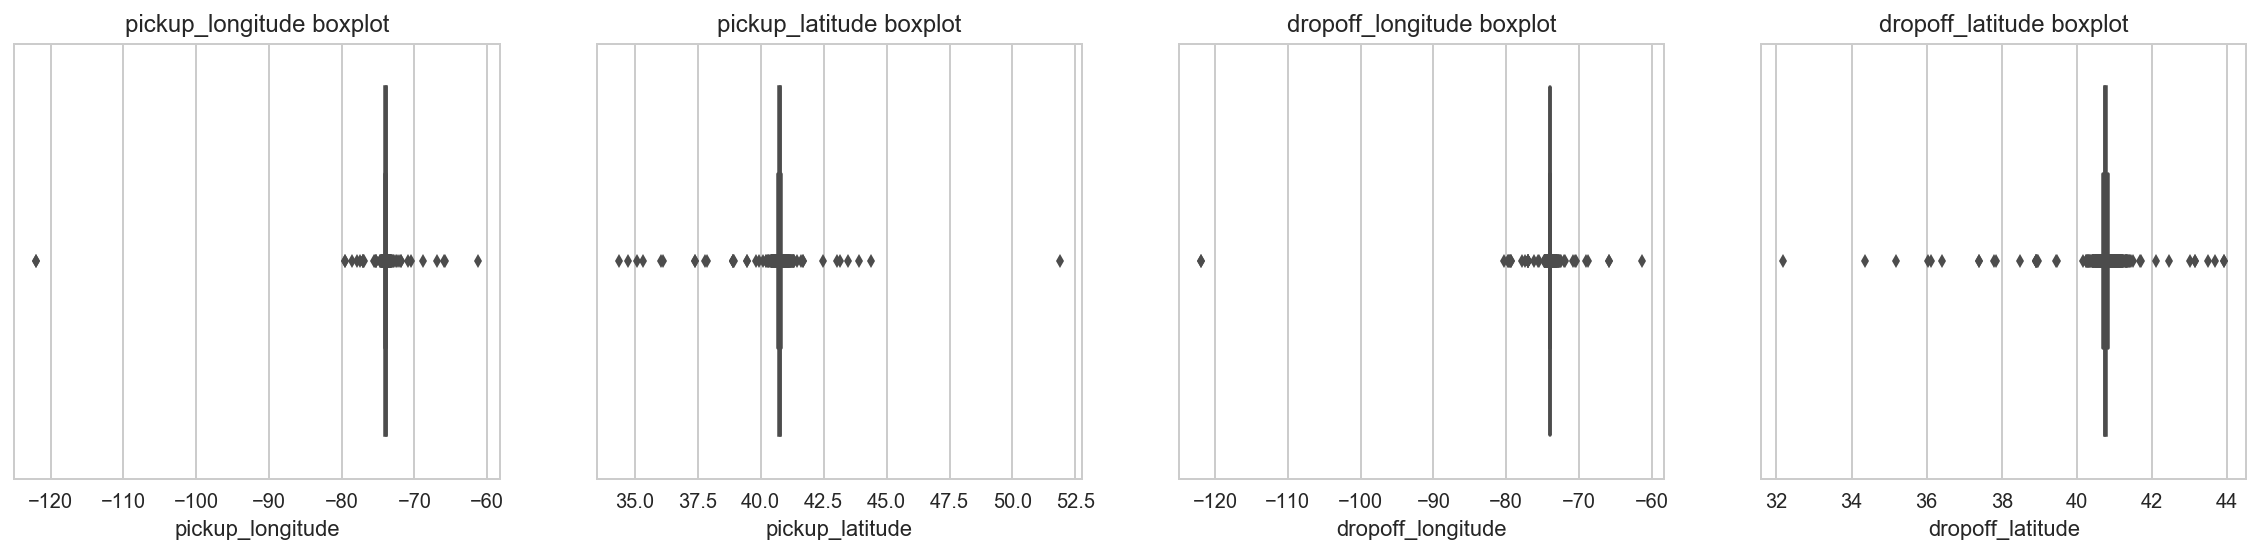

In [14]:
# feature boxplot
plt.figure(figsize=(20, 4))

for i in range(3, 6+1):
    plt.subplot(1, 4, i-2)
    sns.boxplot(x = train[train.columns[i]])
    plt.title('{} boxplot'.format(train.columns[i]))

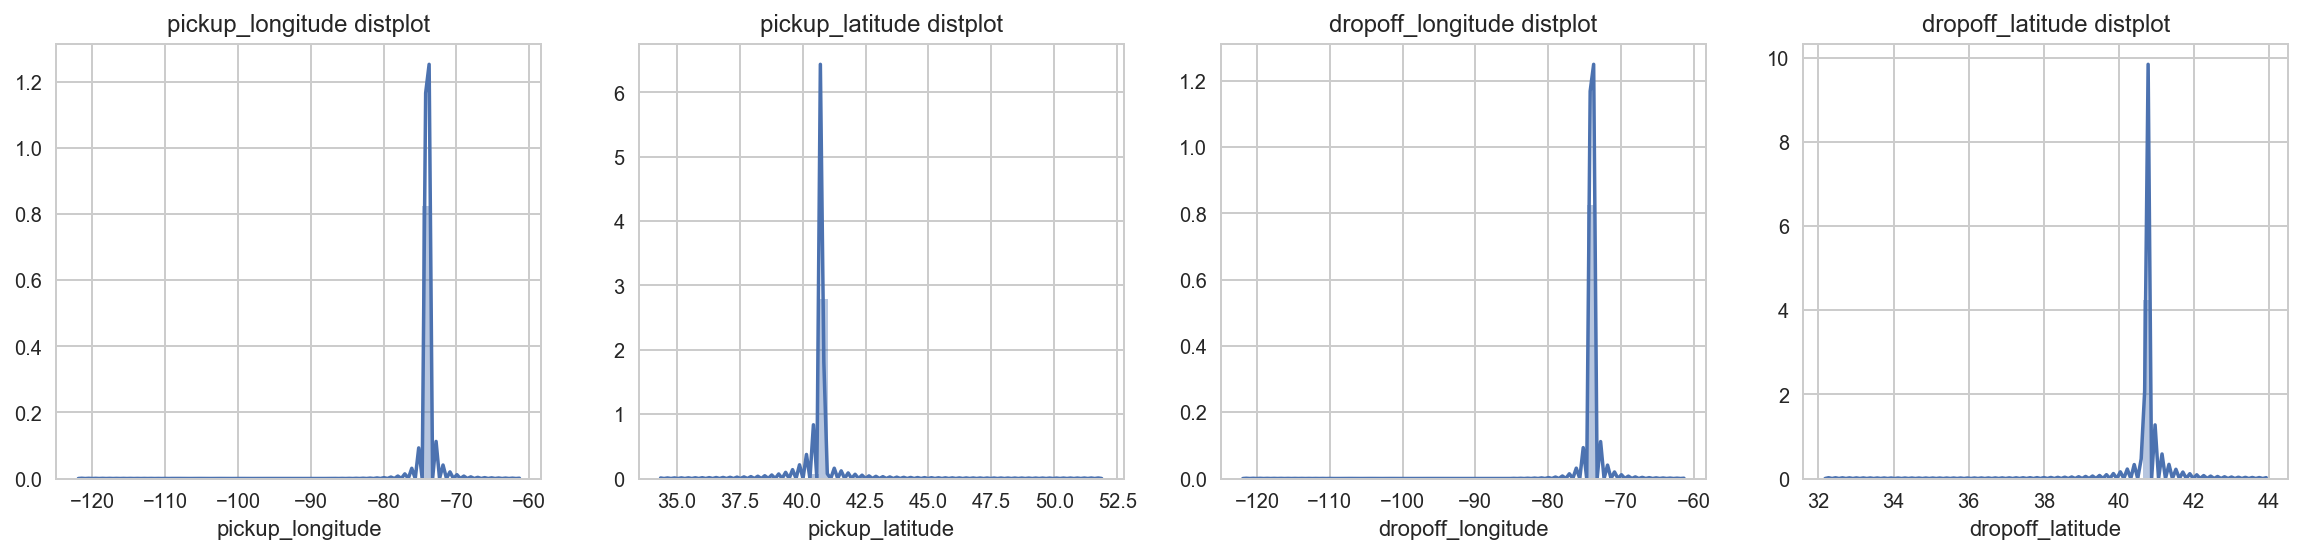

In [15]:
# feature distplot
plt.figure(figsize=(20, 4))

for i in range(3, 6+1):
    plt.subplot(1, 4, i-2)
    sns.distplot(train[train.columns[i]].values, axlabel = train.columns[i])
    plt.title('{} distplot'.format(train.columns[i]))

#### 1.3.3 Date

In [16]:
# M-W-H 분리 (train data 실행)
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime']) 
train['month'] = train['pickup_datetime'].dt.month 
train['weekday'] = train['pickup_datetime'].dt.weekday # 요일 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
train["hour"] = train['pickup_datetime'].dt.hour
train['holiday'] = train['pickup_datetime'].apply(holiday) # 휴일 (1:휴일, 0:평일)

In [17]:
# M-W-H 분리 (test data 실행)
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime']) 
test['month'] = test['pickup_datetime'].dt.month 
test['weekday'] = test['pickup_datetime'].dt.weekday # 요일 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
test["hour"] = test['pickup_datetime'].dt.hour
test['holiday'] = test['pickup_datetime'].apply(holiday) # 휴일 (1:휴일, 0:평일)

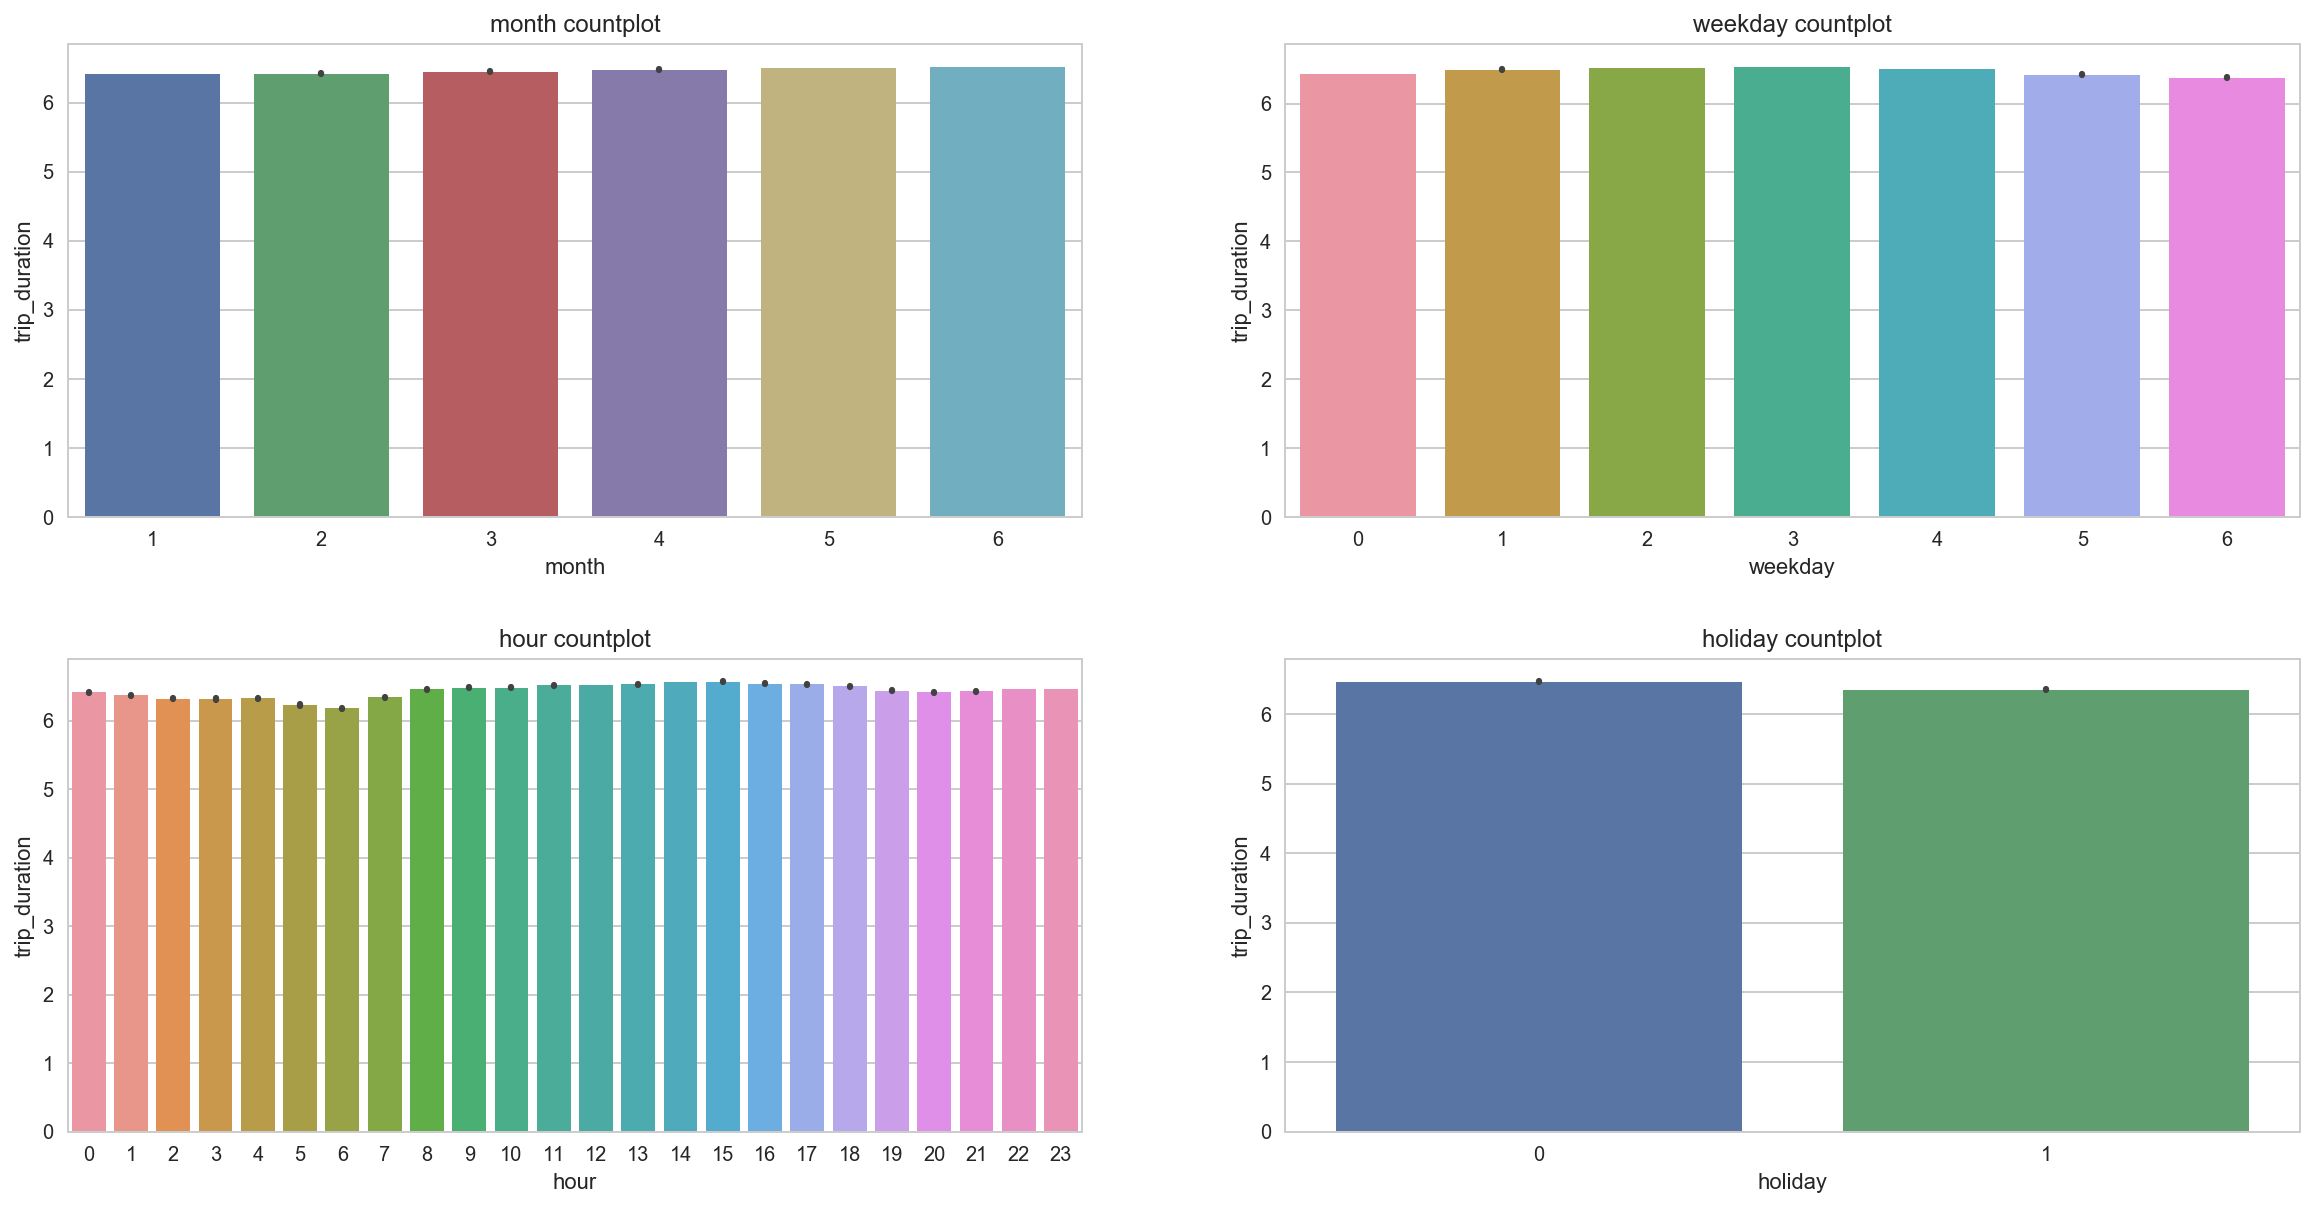

In [18]:
# feature countplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2, 2, i-9)
    sns.barplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} countplot'.format(train.columns[i]))

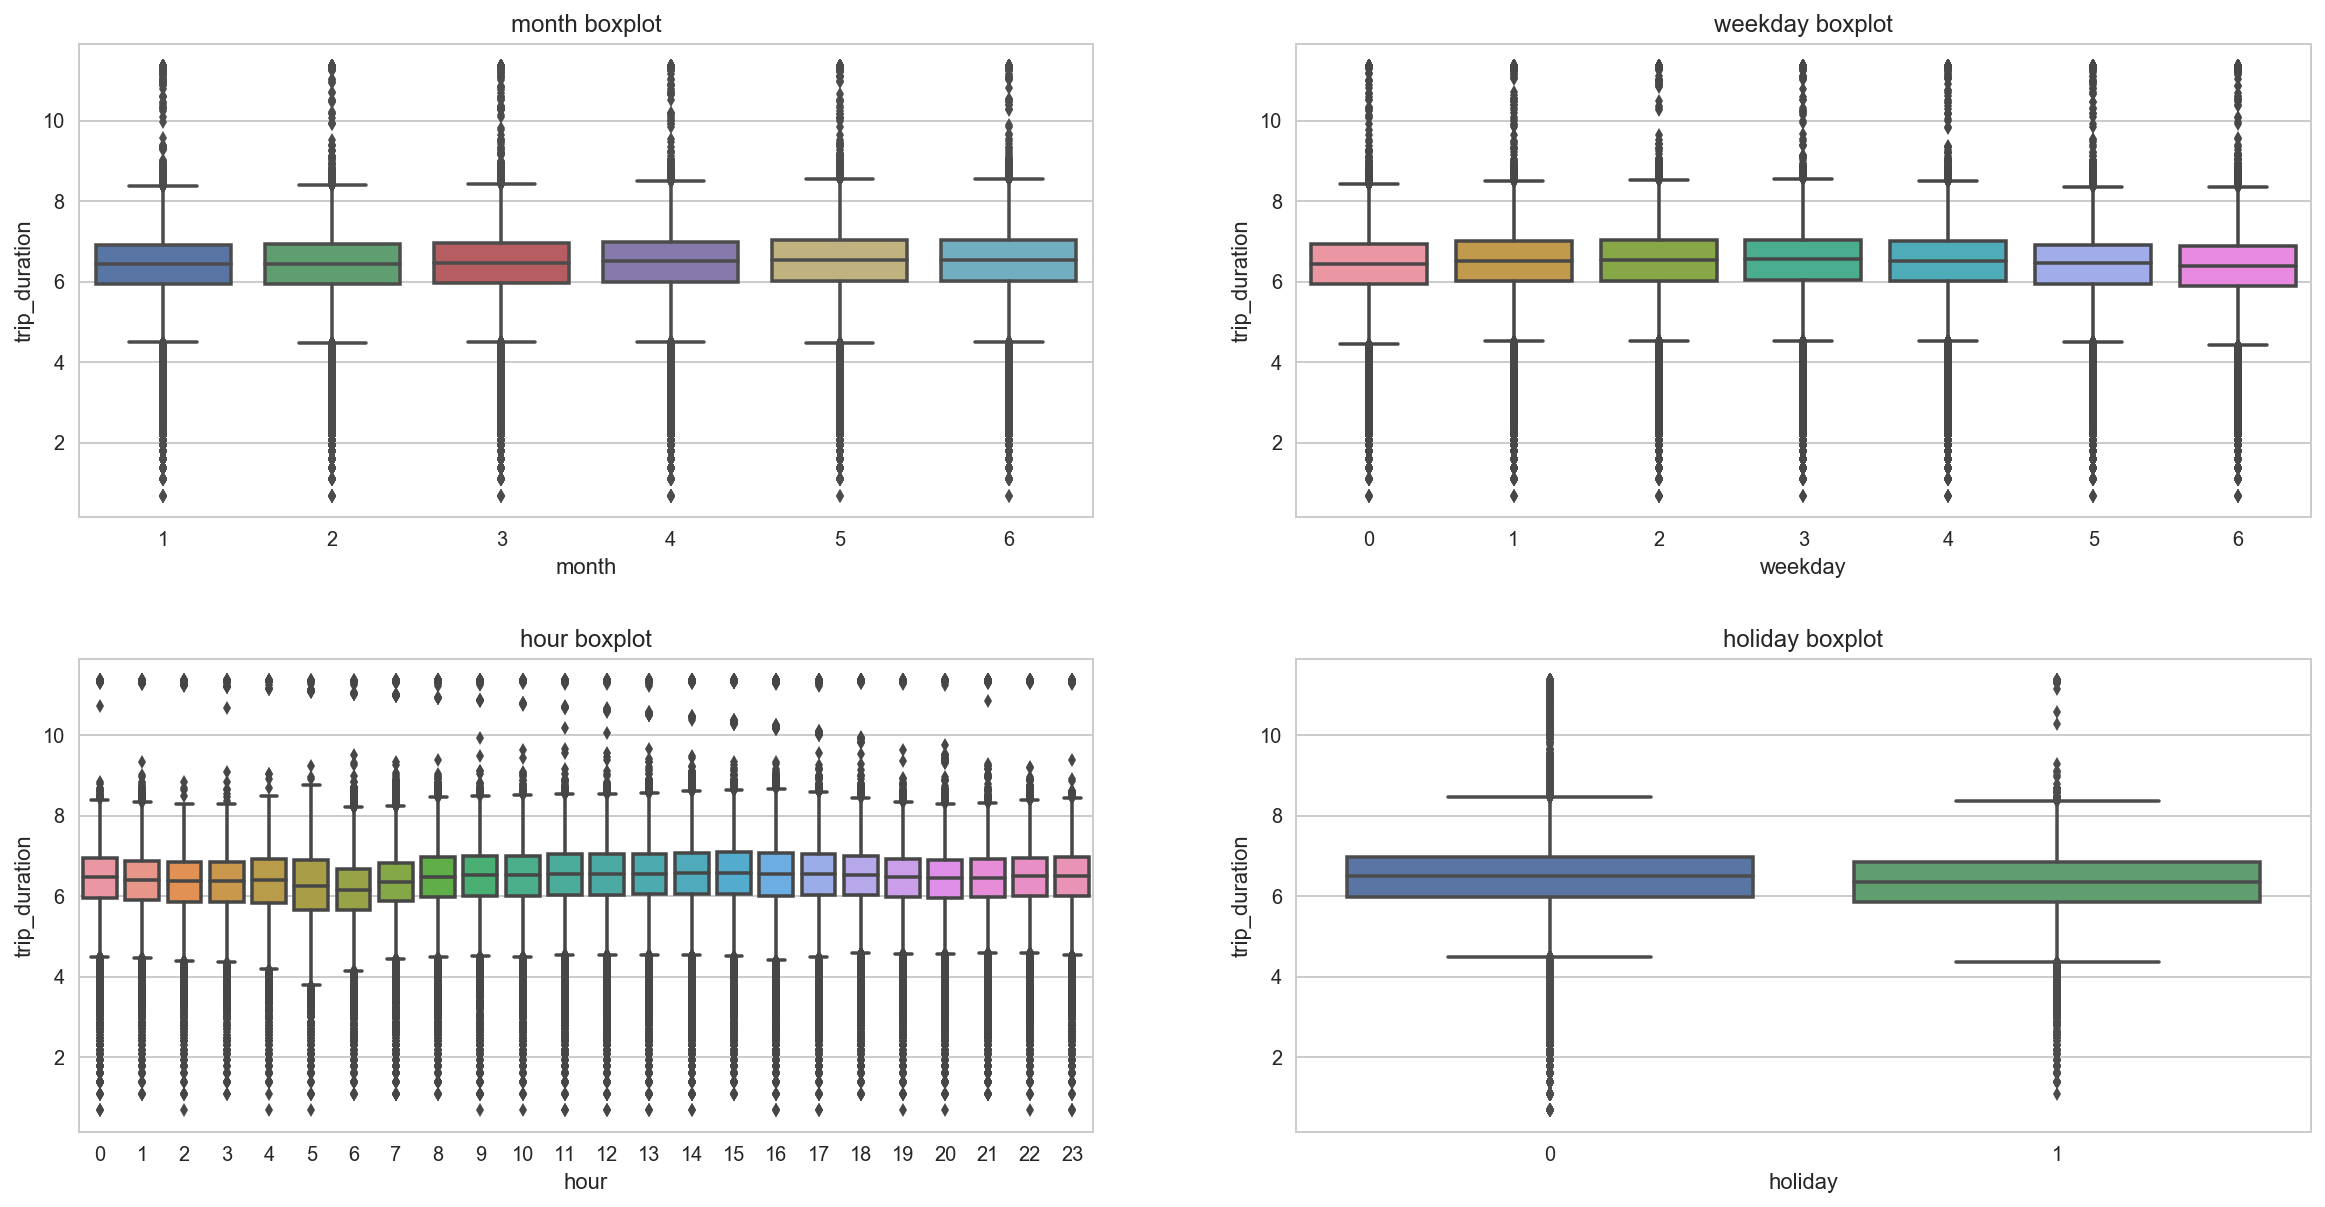

In [19]:
# feature boxplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2, 2, i-9)
    sns.boxplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} boxplot'.format(train.columns[i]))

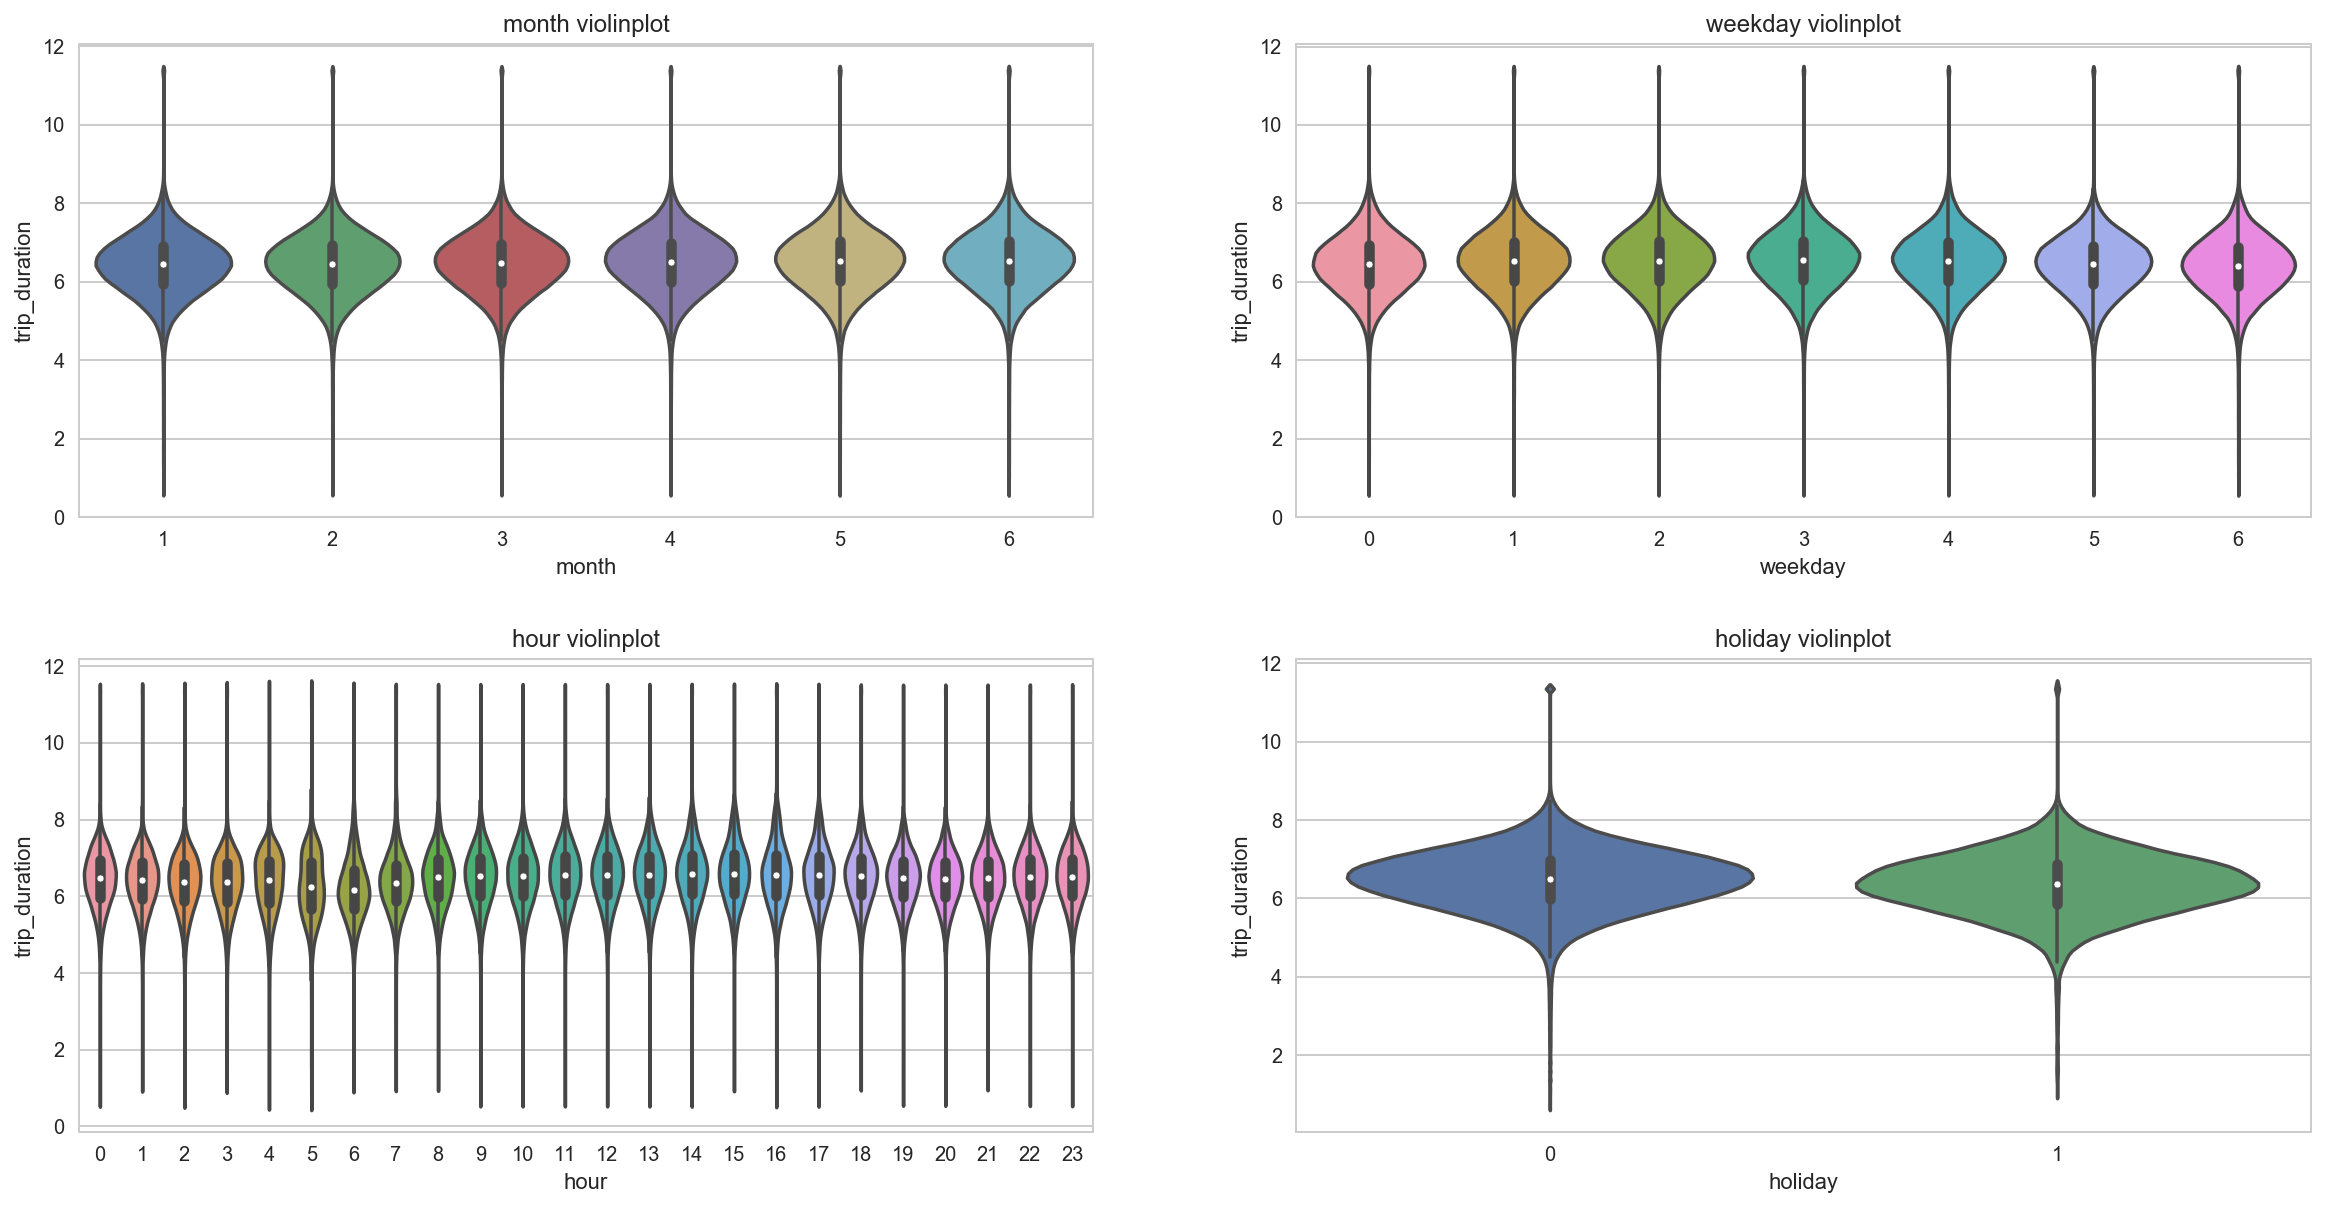

In [20]:
# feature violinplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2, 2, i-9)
    sns.violinplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} violinplot'.format(train.columns[i]))

#### 1.3.4 Add columns

In [21]:
# dist(거리) 생성 - Location이용
train['dist'] = haversine_np(train['pickup_longitude'], train['pickup_latitude'], 
                            train['dropoff_longitude'], train['dropoff_latitude'])

# dist(거리) 생성 - Location이용
test['dist'] = haversine_np(test['pickup_longitude'], test['pickup_latitude'], 
                            test['dropoff_longitude'], test['dropoff_latitude'])

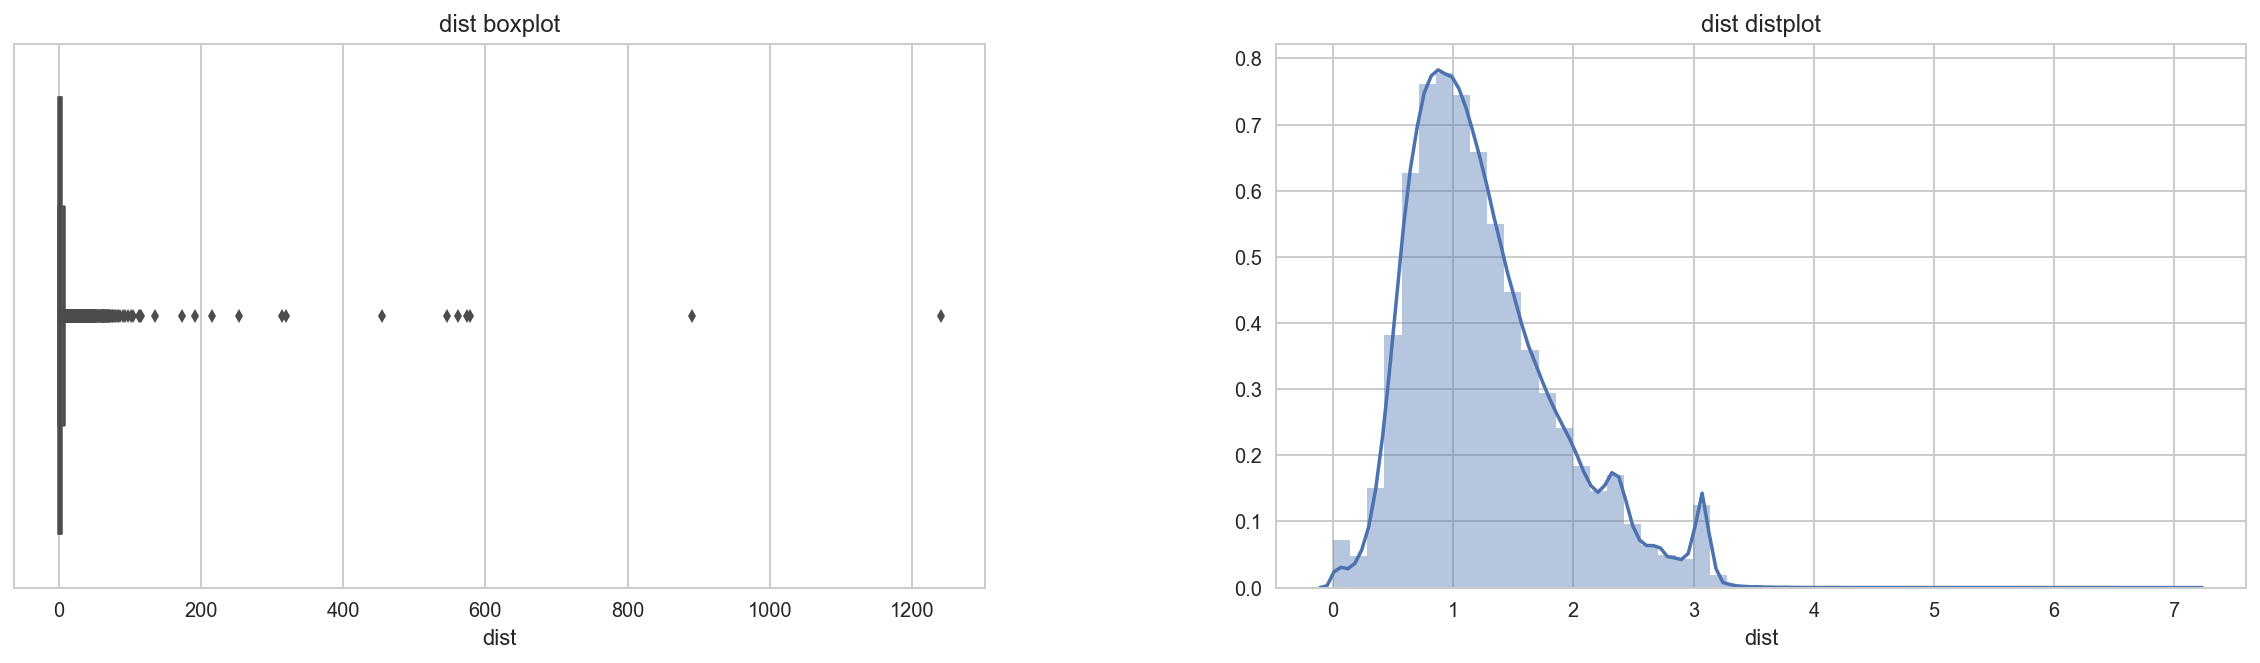

In [22]:
# dist
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

# boxplot
plt.subplot(121)
sns.boxplot(x = 'dist', data = train)
plt.title('dist boxplot')

# distplot
plt.subplot(122)
sns.distplot(np.log1p(train['dist']).values, axlabel = 'dist')
plt.title('dist distplot')

plt.show()

#### Note :

1. 이상치가 너무 커서 데이터를 파악하기 힘듦 (outlier 제거)
2. 분포 시각화에 대한 필요성 (log)

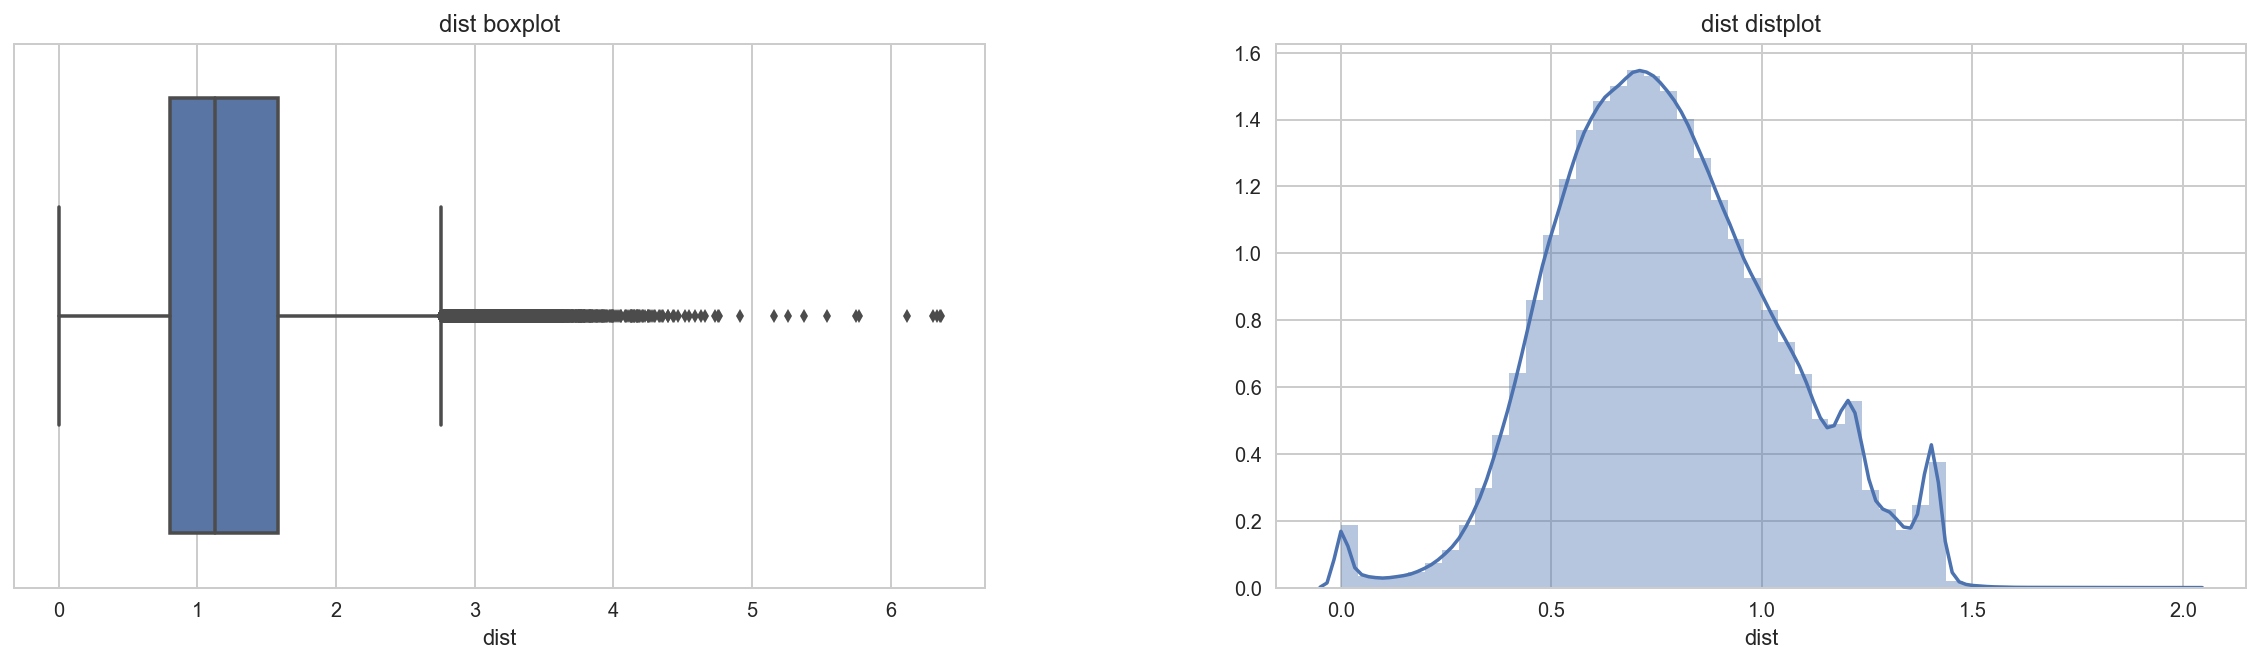

In [23]:
# 약간의 preprocessing
train = train[train['dist'] < 800].reset_index(drop=True) # 4개 outlier 제거
train['dist'] = np.log1p(train['dist'])

# dist
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

# boxplot
plt.subplot(121)
sns.boxplot(x = 'dist', data = train)
plt.title('dist boxplot')

# distplot
plt.subplot(122)
sns.distplot(np.log1p(train['dist']).values, axlabel = 'dist')
plt.title('dist distplot')

plt.show()

### 1.4 Y data & X data(two features)

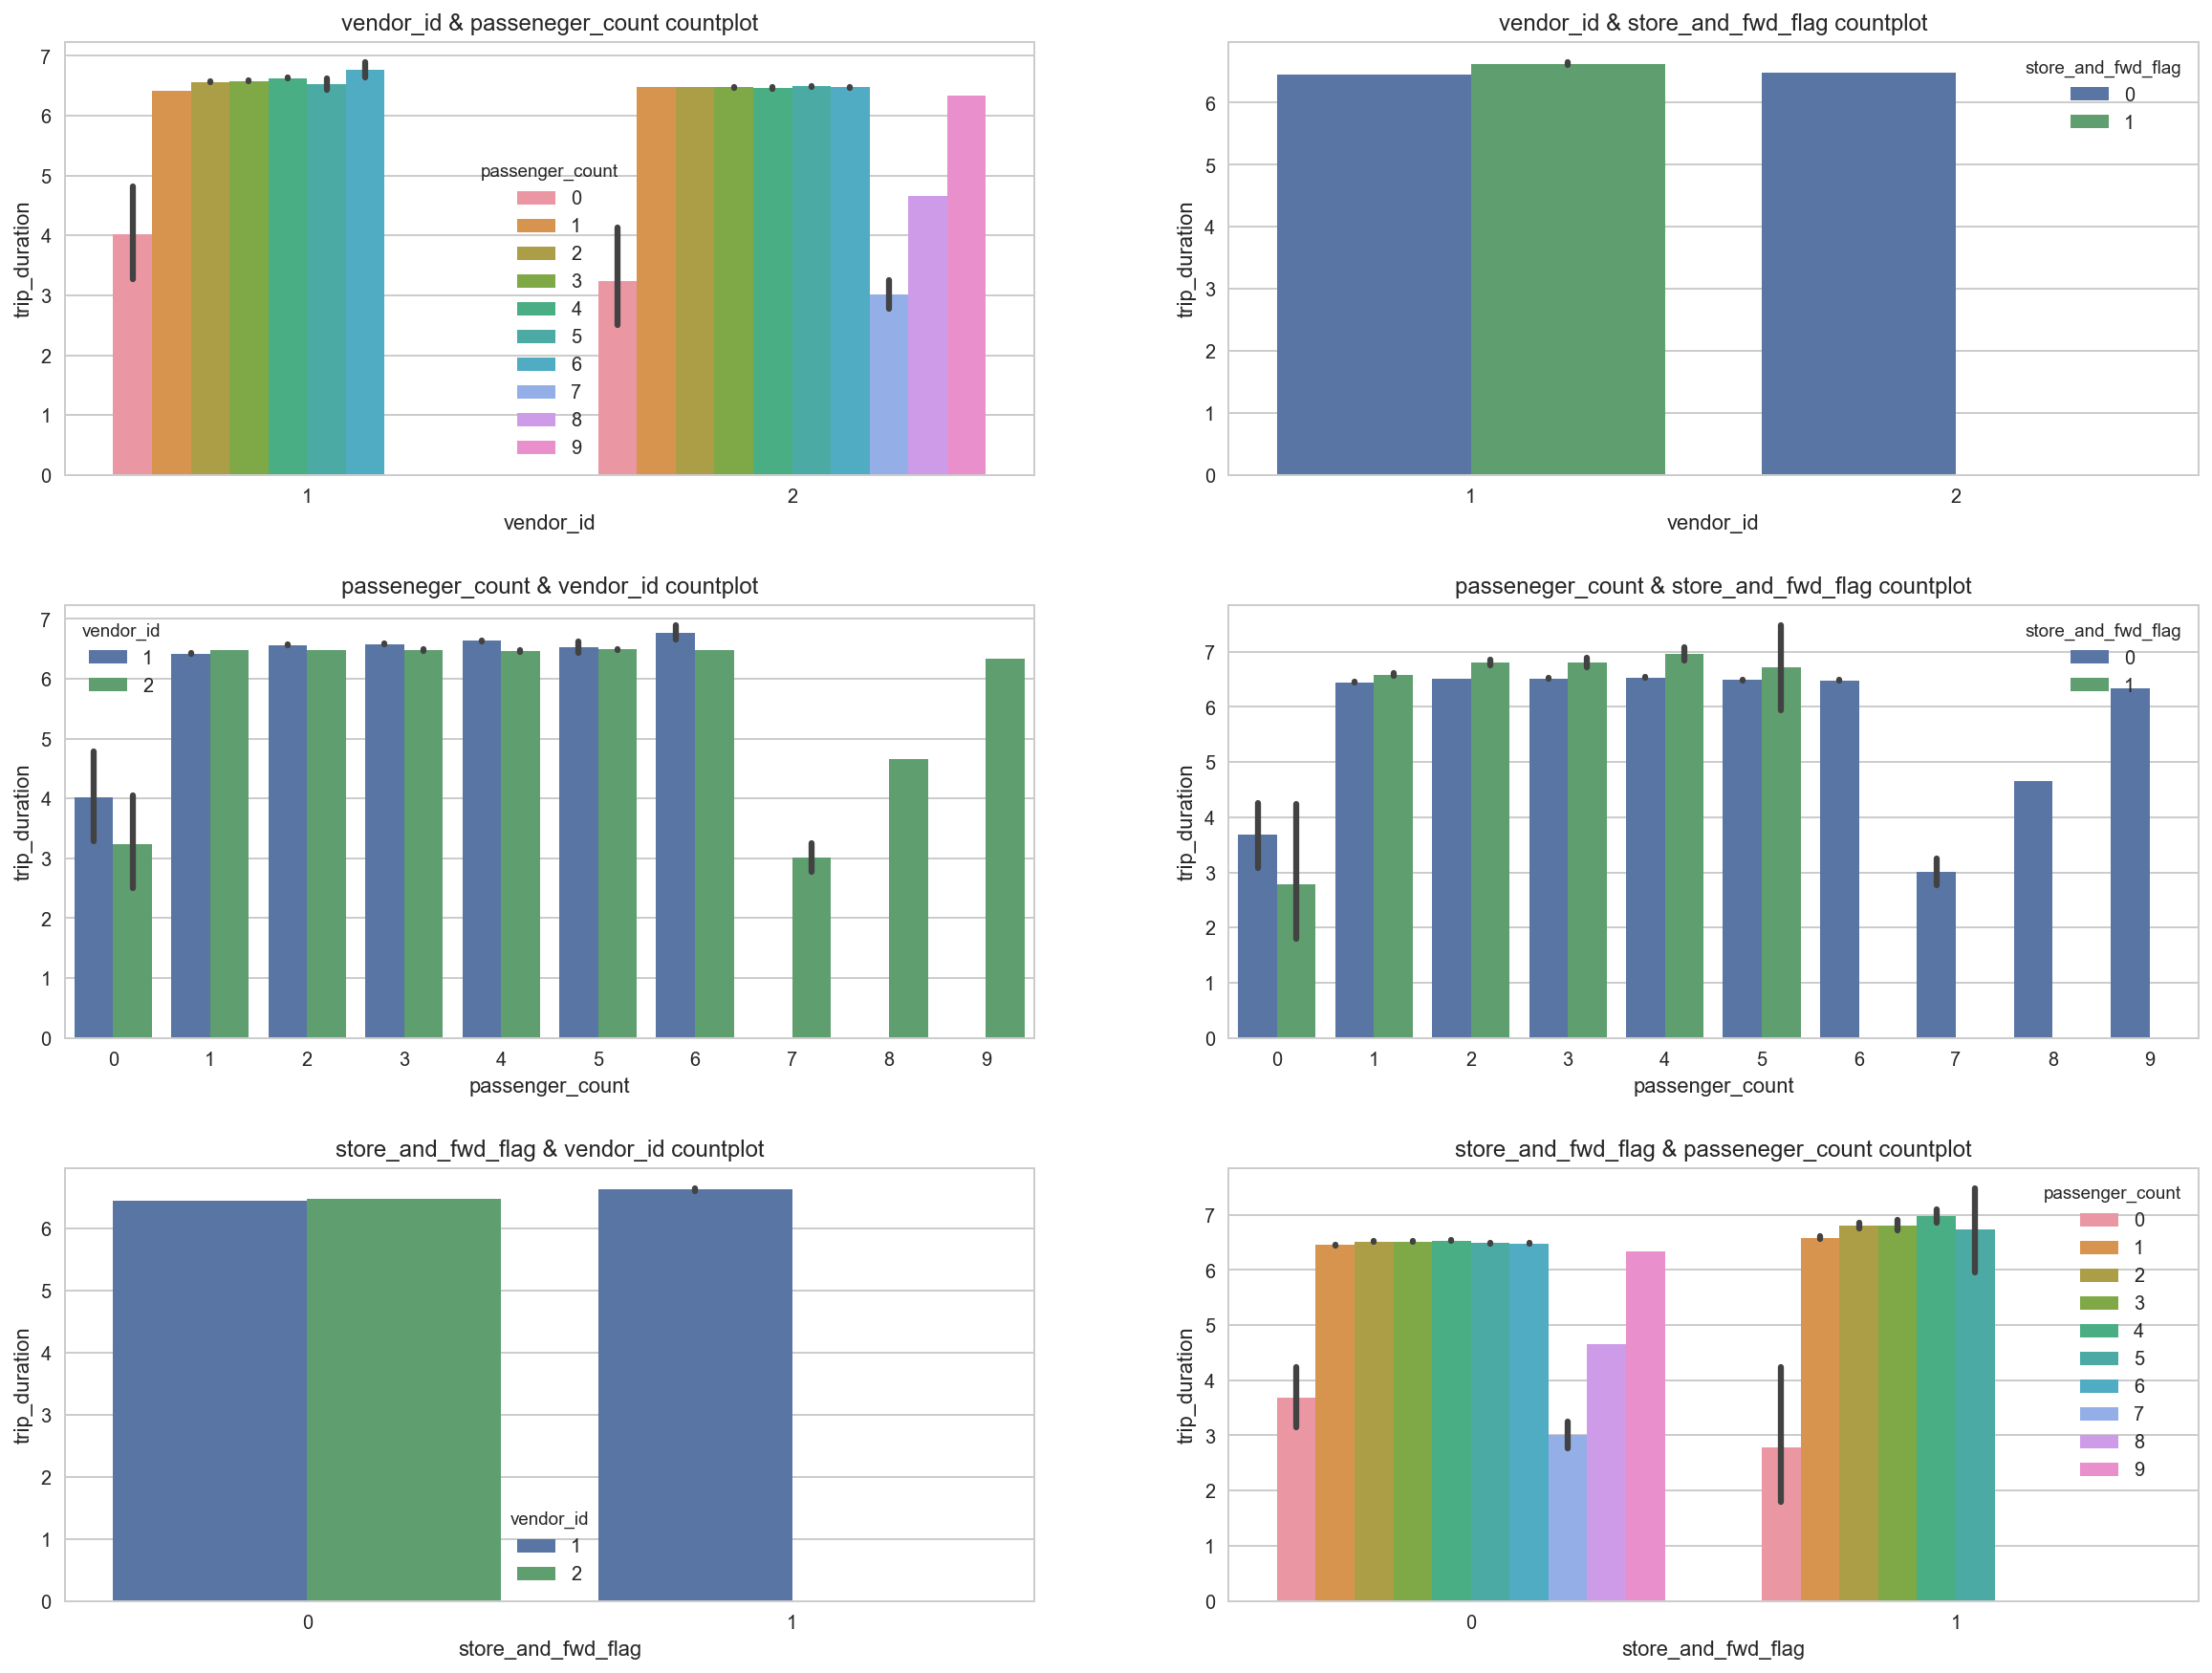

In [24]:
# detail countplot
plt.figure(figsize=(20, 15))
subplots_adjust(hspace = 0.3)

plt.subplot(3, 2, 1)
sns.barplot(x = 'vendor_id', y = 'trip_duration', hue = 'passenger_count', data = train)
plt.title('vendor_id & passeneger_count countplot')

plt.subplot(3, 2, 2)
sns.barplot(x = 'vendor_id', y = 'trip_duration', hue = 'store_and_fwd_flag', data = train)
plt.title('vendor_id & store_and_fwd_flag countplot')

plt.subplot(3, 2, 3)
sns.barplot(x = 'passenger_count', y = 'trip_duration', hue = 'vendor_id', data = train)
plt.title('passeneger_count & vendor_id countplot')

plt.subplot(3, 2, 4)
sns.barplot(x = 'passenger_count', y = 'trip_duration', hue = 'store_and_fwd_flag', data = train)
plt.title('passeneger_count & store_and_fwd_flag countplot')

plt.subplot(3, 2, 5)
sns.barplot(x = 'store_and_fwd_flag', y = 'trip_duration', hue = 'vendor_id', data = train)
plt.title('store_and_fwd_flag & vendor_id countplot')

plt.subplot(3, 2, 6)
sns.barplot(x = 'store_and_fwd_flag', y = 'trip_duration', hue = 'passenger_count', data = train)
plt.title('store_and_fwd_flag & passeneger_count countplot')

plt.show()

### 1.5 Correlation

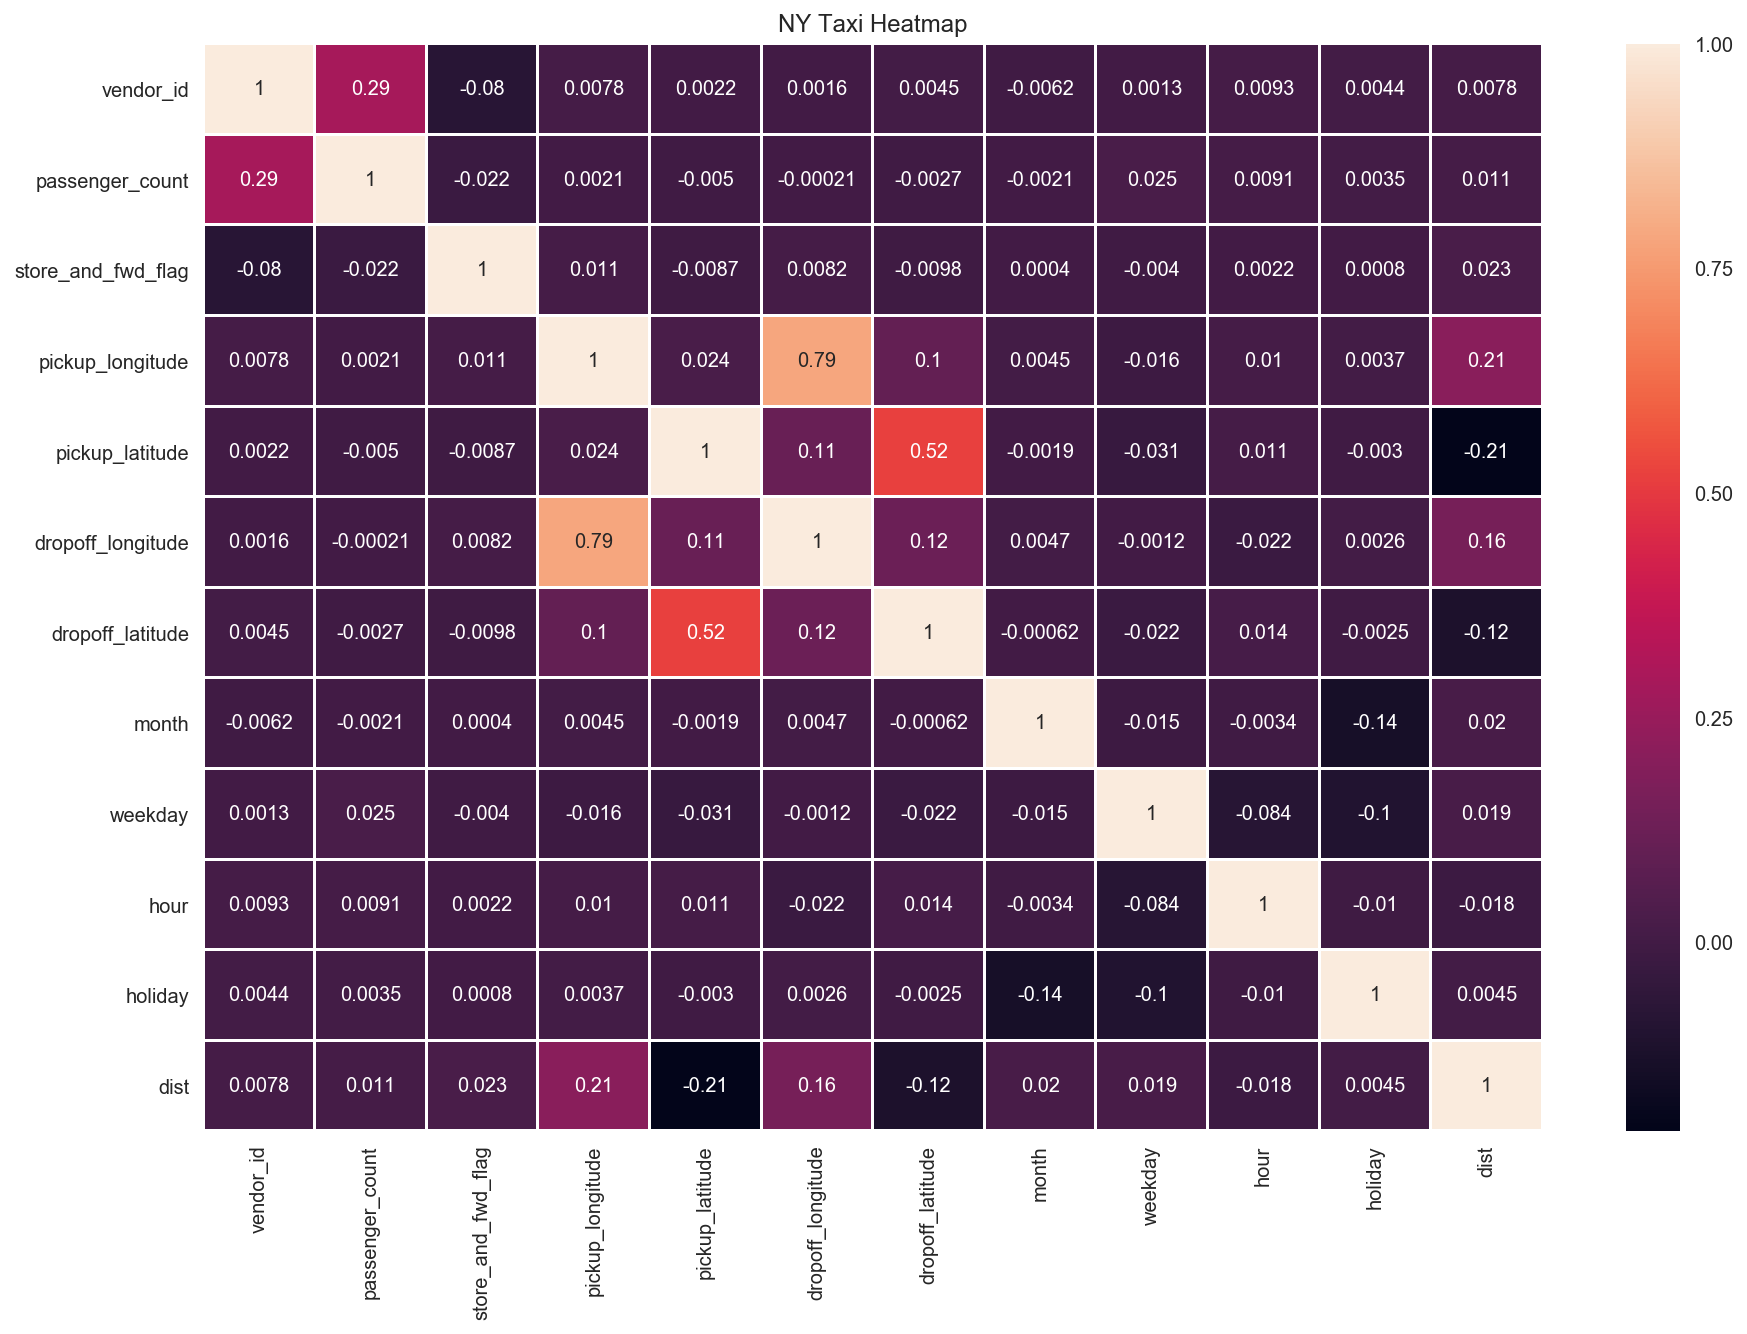

In [25]:
# correlation
correlation = train.drop(['trip_duration'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation.corr(), annot=True, linewidths=1)
plt.title('NY Taxi Heatmap')
plt.show()

In [26]:
# 데이터 재정렬
categorical = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'month', 'weekday', 'hour', 'holiday']
continuous = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'dist']
y_data = ['trip_duration']

# train data
train = pd.concat([train[categorical], train[continuous], train[y_data]], axis = 1)

# test data
test = pd.concat([test[categorical], test[continuous]], axis = 1)

---

# 2. Feature select

### 2.1 Check VIF

In [27]:
# check VIF
train_vif = train.drop(['trip_duration'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif["features"] = train_vif.columns
vif

,VIF Factor,features
0,1.148465e+01,vendor_id
1,2.841064e+00,passenger_count
2,1.012641e+00,store_and_fwd_flag
3,5.488730e+00,month
4,3.510615e+00,weekday
5,5.578527e+00,hour
6,1.057940e+00,holiday
7,2.887215e+06,pickup_longitude
8,1.886480e+06,pickup_latitude
9,2.710764e+06,dropoff_longitude


In [28]:
# remove high VIF
train = train.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1)
test = test.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1)

### 2.2 Rough Modeling

In [29]:
# bias ogmantation
train = sm.add_constant(train)
test = sm.add_constant(test)

In [30]:
# regression model
model =  sm.OLS.from_formula('trip_duration ~ vendor_id + passenger_count + store_and_fwd_flag + \
                              month + weekday + hour + holiday + dist', data = train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 2.403e+05
Date:                Mon, 28 May 2018   Prob (F-statistic):               0.00
Time:                        20:14:47   Log-Likelihood:            -1.1231e+06
No. Observations:             1458638   AIC:                         2.246e+06
Df Residuals:                 1458629   BIC:                         2.246e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1604      0.002   2301.363      0.000       5.156       5.165
vendor_id              0.0171      0.001     18.857      0.000       0.015       0.019
passenger_count        0.0062      0.000     18.165      0.000       0.006       0.007
store_and_fwd_flag    -0.0146      0.006     -2.488      0.013      -0.026      -0.003
month                  0.0131      0.000     50.443      0.000       0.013       0.014
weekday               -0.0164      0.000    -73.500      0.000      -0.017      -0.016
hour                   0.0060   6.79e-05     89.012      0.000       0.006       0.006
holiday               -0.1364      0.003    -48.388      0.000      -0.142      -0.131
dist                   0.9530      0.001   1379.632      0.000       0.952       0.954
==============================================================================
Omnibus:                   373760.964   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12535739.854
Skew:                           0.571   Prob(JB):                         0.00
Kurtosis:                      17.316   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.3 Optimal regulization

#### 2.3.1 Dist scaling

In [31]:
# dist scale train
distset1 = dmatrix("scale(np.log1p(dist)) + scale(np.log1p(dist)**2) + scale(np.log1p(dist)**3) \
                 + scale(np.log1p(dist)**4) + scale(np.log1p(dist)**5) + 0", data = train, return_type = 'dataframe')

# columns name 변경
distset1.columns = ['dist1', 'dist2', 'dist3', 'dist4', 'dist5']

In [32]:
# dist scale test
distset2 = dmatrix("scale(np.log1p(dist)) + scale(np.log1p(dist)**2) + scale(np.log1p(dist)**3) \
                 + scale(np.log1p(dist)**4) + scale(np.log1p(dist)**5) + 0", data = test, return_type = 'dataframe')

# columns name 변경
distset2.columns = ['dist1', 'dist2', 'dist3', 'dist4', 'dist5']

In [33]:
# taxi에 distset concat
train = pd.concat([train, distset1], axis=1)
test = pd.concat([test, distset2], axis=1)

#### 2.3.2 dist

In [34]:
# dist 
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("trip_duration ~ dist", data = train).fit(), result_sets, "dist")
storage(sm.OLS.from_formula("trip_duration ~ dist + I(dist ** 2)", data = train).fit(), result_sets,"~ dist^2")
storage(sm.OLS.from_formula("trip_duration ~ dist + I(dist ** 2) + I(dist ** 3)", data = train).fit(),  result_sets," ~ dist^3")
storage(sm.OLS.from_formula("trip_duration ~ dist + I(dist ** 2) + I(dist ** 3) + I(dist ** 4)", data = train).fit(), result_sets, " ~ dist^4")
storage(sm.OLS.from_formula("trip_duration ~ dist + I(dist ** 2) + I(dist ** 3) + I(dist ** 4) + I(dist ** 5)", data = train).fit(), result_sets, " ~ dist^5")

result_sets

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.562,2266814.106,2266838.492,4.509,0.0,0.0,0.0,1.998,dist
1,0.591,2169254.770,2169291.349,23.767,0.0,0.0,0.0,1.998,~ dist^2
2,0.594,2157904.502,2157953.274,135.189,0.0,0.0,0.0,1.998,~ dist^3
3,0.594,2156978.938,2157039.904,623.888,0.0,0.0,0.0,1.998,~ dist^4
4,0.595,2155581.482,2155654.640,3864.011,0.0,0.0,0.0,1.998,~ dist^5


#### 2.3.3 vendor_id

In [35]:
# vendor_id
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("trip_duration ~ dist1", data = train).fit(), result_sets,"default")
storage(sm.OLS.from_formula("trip_duration ~ vendor_id + dist1", data = train).fit(), result_sets,"vendor_id")
storage(sm.OLS.from_formula("trip_duration ~ C(vendor_id) + dist1", data = train).fit(), result_sets,"C(vendor_id)")
result_sets

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.592,2164841.136,2164865.522,1.000,0.0,0.0,0.0,1.998,default
1,0.592,2164101.227,2164137.806,7.086,0.0,0.0,0.0,1.998,vendor_id
2,0.592,2164101.227,2164137.806,2.708,0.0,0.0,0.0,1.998,C(vendor_id)


#### 2.3.4 passenger count

In [36]:
# passenger count
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("trip_duration ~ dist1", data = train).fit(), result_sets,"default")
storage(sm.OLS.from_formula("trip_duration ~ passenger_count + dist1", data = train).fit(), result_sets,"passenger_count")
storage(sm.OLS.from_formula("trip_duration ~ C(passenger_count)+dist1", data = train).fit(), result_sets,"C(passenger_count)")
result_sets

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.592,2164841.136,2164865.522,1.000,0.0,0.0,0.0,1.998,default
1,0.592,2164279.931,2164316.510,3.929,0.0,0.0,0.0,1.998,passenger_count
2,0.592,2163170.925,2163305.048,1551.403,0.0,0.0,0.0,1.998,C(passenger_count)


#### 2.3.5 store_and_fwd_flag

In [37]:
# store_and_fwd_flag
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("trip_duration ~ dist1", data = train).fit(), result_sets,"default")
storage(sm.OLS.from_formula("trip_duration ~ store_and_fwd_flag + dist1", data = train).fit(), result_sets,"store_and_fwd_flag")
storage(sm.OLS.from_formula("trip_duration ~ C(store_and_fwd_flag) + dist1", data = train).fit(), result_sets,"C(store_and_fwd_flag)")
result_sets

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.592,2164841.136,2164865.522,1.000,0.0,0.0,0.0,1.998,default
1,0.592,2164842.503,2164879.082,13.505,0.0,0.0,0.0,1.998,store_and_fwd_flag
2,0.592,2164842.503,2164879.082,13.505,0.0,0.0,0.0,1.998,C(store_and_fwd_flag)


#### 2.3.6 month

In [38]:
# month
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("trip_duration ~ dist1", data = train).fit(), result_sets,"default")
storage(sm.OLS.from_formula("trip_duration ~ month + dist1", data = train).fit(), result_sets,"store_and_fwd_flag")
storage(sm.OLS.from_formula("trip_duration ~ C(month) + dist1", data = train).fit(), result_sets,"C(store_and_fwd_flag)")
result_sets

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.592,2164841.136,2164865.522,1.000,0.0,0.0,0.0,1.998,default
1,0.593,2161272.816,2161309.395,9.530,0.0,0.0,0.0,1.998,store_and_fwd_flag
2,0.593,2161133.393,2161218.744,7.033,0.0,0.0,0.0,1.998,C(store_and_fwd_flag)


#### 2.3.7 weekday

In [39]:
# weekday
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("trip_duration ~ dist1", data = train).fit(), result_sets,"default")
storage(sm.OLS.from_formula("trip_duration ~ weekday + dist1", data = train).fit(), result_sets,"store_and_fwd_flag")
storage(sm.OLS.from_formula("trip_duration ~ C(weekday) + dist1", data = train).fit(), result_sets,"C(store_and_fwd_flag)")
result_sets

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.592,2164841.136,2164865.522,1.000,0.0,0.0,0.0,1.998,default
1,0.594,2157953.613,2157990.192,7.088,0.0,0.0,0.0,1.998,store_and_fwd_flag
2,0.600,2135767.311,2135864.855,8.265,0.0,0.0,0.0,1.999,C(store_and_fwd_flag)


#### 2.3.8 holiday

In [40]:
# holiday
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("trip_duration ~ dist1", data = train).fit(), result_sets,"default")
storage(sm.OLS.from_formula("trip_duration ~ holiday + dist1", data = train).fit(), result_sets,"holiday")
storage(sm.OLS.from_formula("trip_duration ~ C(holiday) + dist1", data = train).fit(), result_sets,"C(holiday)")
result_sets

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.592,2164841.136,2164865.522,1.000,0.0,0.0,0.0,1.998,default
1,0.593,2162459.253,2162495.832,6.418,0.0,0.0,0.0,1.998,holiday
2,0.593,2162459.253,2162495.832,6.418,0.0,0.0,0.0,1.998,C(holiday)


#### Feature Select :

-  dist1 , I(dist1 ** 2) , C(weekday) , C(hour) , C(holiday)

---

# 3. Modeing

### 3.1 Origin model (0.50021)

In [41]:
# origin data model
model = sm.OLS.from_formula("trip_duration ~ dist1 + I(dist1 ** 2) + C(weekday) + C(hour) + C(holiday) + 0", data = train)
result = model.fit()

In [42]:
# 테스트 데이터를 통해 y값 예측
y_hat = result.predict(test)
y_hat = y_hat.apply(lambda x: (round(np.exp(x))),0)
ans = pd.concat([submission['id'], y_hat], axis=1)
ans.rename(columns={'id':'id' , 0 :'trip_duration'}, inplace=True)
ans.tail()

,id,trip_duration
625129,id3008929,288
625130,id3700764,1062
625131,id2568735,1327
625132,id1384355,2782
625133,id0621643,1025


### 3.2 Outlier 1회 (0.49692)

In [43]:
out1 = cooks_distace(result, train)
out1.tail()

,const,vendor_id,passenger_count,store_and_fwd_flag,month,weekday,hour,holiday,dist,trip_duration,dist1,dist2,dist3,dist4,dist5
1407672,1.0,2,4,0,4,4,13,0,0.799447,6.658011,-0.705403,-0.748634,-0.706901,-0.635343,-0.559495
1407673,1.0,1,1,0,1,6,7,0,1.952465,6.486161,1.143658,1.131169,1.023297,0.870649,0.703407
1407674,1.0,2,1,0,4,4,6,0,2.176987,6.639876,1.417352,1.504119,1.470464,1.364599,1.216983
1407675,1.0,1,1,0,1,1,15,0,0.738062,5.924256,-0.835014,-0.838595,-0.761840,-0.666252,-0.575862
1407676,1.0,1,1,0,4,1,14,0,0.757684,5.293305,-0.793092,-0.810097,-0.744799,-0.656867,-0.570999


In [44]:
# Outlier1 data model
model1 = sm.OLS.from_formula("trip_duration ~ dist1 + I(dist1 ** 2) + C(weekday) + C(hour) + 0", data = out1)
result1 = model1.fit()

In [45]:
# 테스트 데이터를 통해 y값 예측
y_hat = result1.predict(test)
y_hat = y_hat.apply(lambda x: (round(np.exp(x))),0)
ans = pd.concat([submission['id'], y_hat], axis=1)
ans.rename(columns={'id':'id' , 0 :'trip_duration'}, inplace=True)
ans.tail()

,id,trip_duration
625129,id3008929,317
625130,id3700764,1190
625131,id2568735,1473
625132,id1384355,2885
625133,id0621643,1150


### 3.3 Outlier 2회 (0.49563)

In [46]:
out2 = cooks_distace(result1, out1)
out2.tail()

,const,vendor_id,passenger_count,store_and_fwd_flag,month,weekday,hour,holiday,dist,trip_duration,dist1,dist2,dist3,dist4,dist5
1341670,1.0,2,5,0,2,1,0,0,1.198757,6.028279,0.042991,-0.122072,-0.242235,-0.315782,-0.351318
1341671,1.0,2,4,0,4,4,13,0,0.799447,6.658011,-0.705403,-0.748634,-0.706901,-0.635343,-0.559495
1341672,1.0,1,1,0,1,6,7,0,1.952465,6.486161,1.143658,1.131169,1.023297,0.870649,0.703407
1341673,1.0,2,1,0,4,4,6,0,2.176987,6.639876,1.417352,1.504119,1.470464,1.364599,1.216983
1341674,1.0,1,1,0,1,1,15,0,0.738062,5.924256,-0.835014,-0.838595,-0.761840,-0.666252,-0.575862


In [47]:
# Outlier2 data model
model2 = sm.OLS.from_formula("trip_duration ~ dist1 + I(dist1 ** 2) + C(weekday) + C(hour) + 0", data = out2)
result2 = model2.fit()

In [ ]:
# 테스트 데이터를 통해 y값 예측
y_hat = result2.predict(test)
y_hat = y_hat.apply(lambda x: (round(np.exp(x))),0)
ans = pd.concat([submission['id'], y_hat], axis=1)
ans.rename(columns={'id':'id' , 0 :'trip_duration'}, inplace=True)
ans.tail()
ans.to_csv('outlier2.csv', index = False)

---

# 4. Evaluation

In [48]:
# summary report
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 1.511e+05
Date:                Mon, 28 May 2018   Prob (F-statistic):               0.00
Time:                        20:18:17   Log-Likelihood:            -3.9128e+05
No. Observations:             1341675   AIC:                         7.826e+05
Df Residuals:                 1341643   BIC:                         7.830e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(weekday)[0]     6.2764      0.002   3725.147      0.000       6.273       6.280
C(weekday)[1]     6.3698      0.002   3811.385      0.000       6.367       6.373
C(weekday)[2]     6.3935      0.002   3849.915      0.000       6.390       6.397
C(weekday)[3]     6.4080      0.002   3883.264      0.000       6.405       6.411
C(weekday)[4]     6.3870      0.002   3915.264      0.000       6.384       6.390
C(weekday)[5]     6.2894      0.002   3895.064      0.000       6.286       6.293
C(weekday)[6]     6.1890      0.002   3796.637      0.000       6.186       6.192
C(hour)[T.1]     -0.0354      0.002    -15.366      0.000      -0.040      -0.031
C(hour)[T.2]     -0.0518      0.003    -20.031      0.000      -0.057      -0.047
C(hour)[T.3]     -0.0861      0.003    -29.445      0.000      -0.092      -0.080
C(hour)[T.4]     -0.1547      0.003    -46.254      0.000      -0.161      -0.148
C(hour)[T.5]     -0.2668      0.003    -78.813      0.000      -0.273      -0.260
C(hour)[T.6]     -0.2074      0.002    -86.326      0.000      -0.212      -0.203
C(hour)[T.7]      0.0189      0.002      9.148      0.000       0.015       0.023
C(hour)[T.8]      0.2169      0.002    109.557      0.000       0.213       0.221
C(hour)[T.9]      0.2614      0.002    132.085      0.000       0.258       0.265
C(hour)[T.10]     0.2567      0.002    128.926      0.000       0.253       0.261
C(hour)[T.11]     0.2882      0.002    146.536      0.000       0.284       0.292
C(hour)[T.12]     0.3009      0.002    154.481      0.000       0.297       0.305
C(hour)[T.13]     0.2909      0.002    149.275      0.000       0.287       0.295
C(hour)[T.14]     0.3123      0.002    161.881      0.000       0.308       0.316
C(hour)[T.15]     0.3197      0.002    164.608      0.000       0.316       0.324
C(hour)[T.16]     0.2858      0.002    143.146      0.000       0.282       0.290
C(hour)[T.17]     0.2732      0.002    142.471      0.000       0.269       0.277
C(hour)[T.18]     0.2506      0.002    135.395      0.000       0.247       0.254
C(hour)[T.19]     0.1684      0.002     91.011      0.000       0.165       0.172
C(hour)[T.20]     0.0826      0.002     44.092      0.000       0.079       0.086
C(hour)[T.21]     0.0539      0.002     28.820      0.000       0.050       0.058
C(hour)[T.22]     0.0502      0.002     26.581      0.000       0.046       0.054
C(hour)[T.23]     0.0163      0.002      8.389      0.000       0.013       0.020
dist1             0.6507      0.000   2048.776      0.000       0.650       0.651
I(dist1 ** 2)    -0.0395      0.000   -161.442      0.000      -0.040      -0.039
==============================================================================
Omnibus:                    18629.029   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB

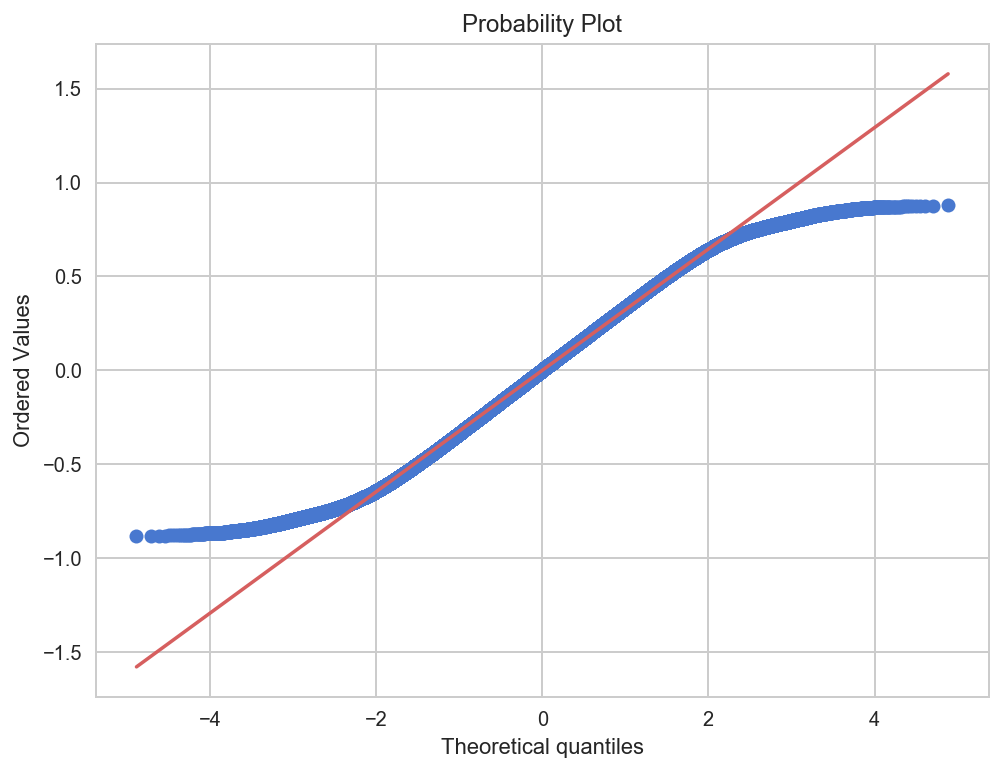

In [49]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result2.resid, plot = plt)

plt.show()

In [50]:
# Chi-square 확인
resid = sms.omni_normtest(result2.resid)
for i in zip(['Chi^2', 'P-value'], resid):
    print("%-12s: %6.3f" % i)

Chi^2       : 18629.029
P-value     :  0.000


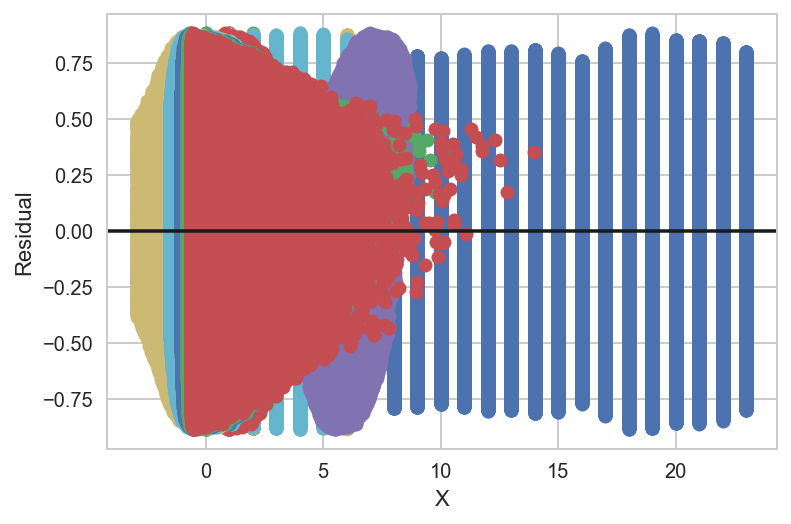

In [51]:
# check resid
plt.plot(out2, result2.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel('X')
plt.ylabel('Residual')

plt.show()

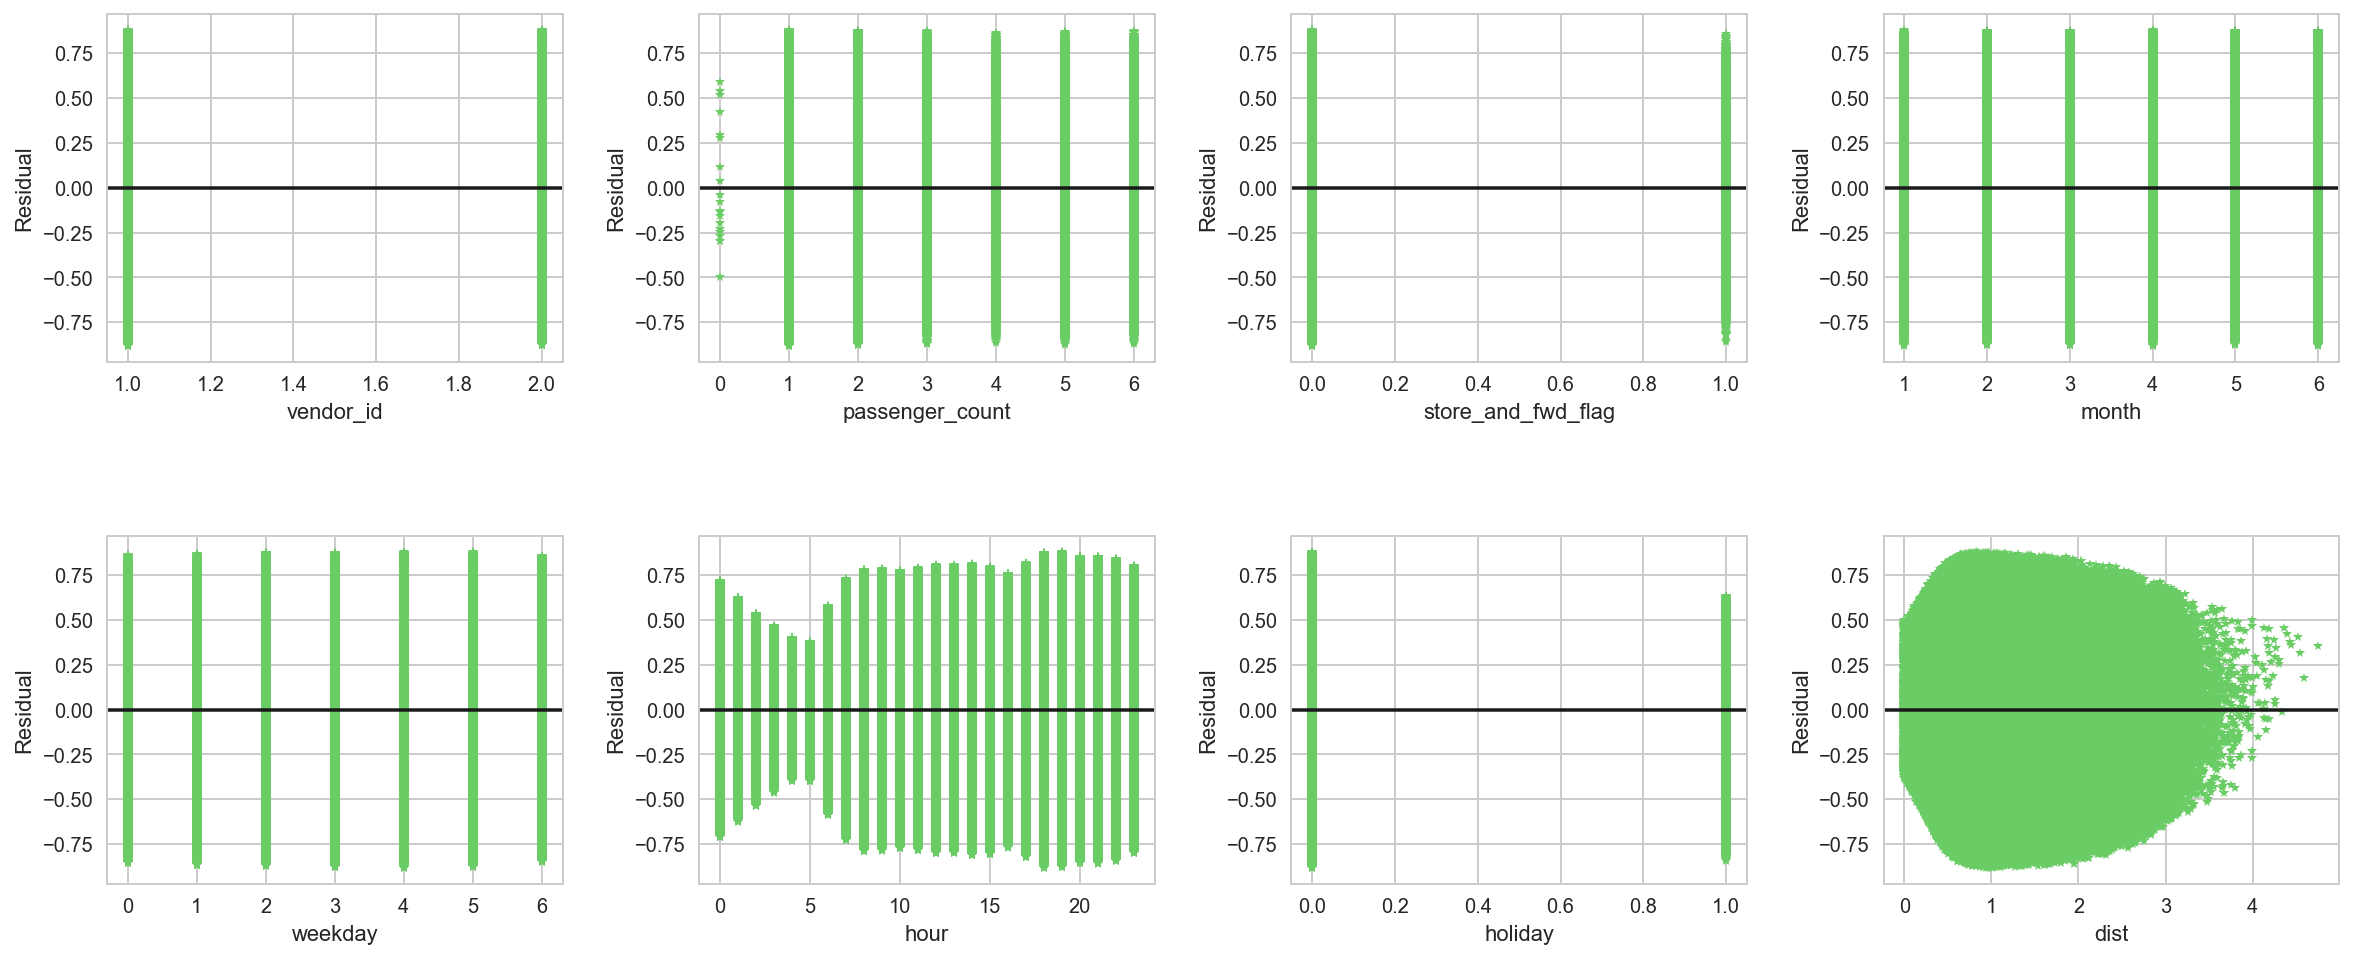

In [52]:
# residual-feature 관계 검정
plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(1, 8+1):
    plt.subplot(2,4,i)
    plt.plot(out2[out2.columns[i]], result2.resid, 'g*', markersize=5)
    plt.axhline(y=0, c='k')
    plt.xlabel(out2.columns[i])
    plt.ylabel("Residual")

plt.show()